In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
data_dir = '/content/drive/MyDrive/Thesis (Skin-Cancer)'

In [ ]:
from PIL import Image
import os
import numpy as np

data_dir = "/content/drive/MyDrive/Thesis (Skin-Cancer)"
image_size = (100, 100)

images = []
labels = []

label_mapping = {'benign': 0, 'malignant': 1}

for class_name in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_name)
    if os.path.isdir(class_dir):
        for image_filename in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_filename)
            # Open and resize the image
            image = Image.open(image_path)
            image = image.resize(image_size)
            image = np.array(image)
            images.append(image)
            labels.append(label_mapping[class_name])

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42)

In [ ]:
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)
print("Shape of X_val: ", X_val.shape)
print("Shape of y_val: ", y_val.shape)

Shape of X_train:  (2317, 100, 100, 3)
Shape of y_train:  (2317,)
Shape of X_test:  (663, 100, 100, 3)
Shape of y_test:  (663,)
Shape of X_val:  (331, 100, 100, 3)
Shape of y_val:  (331,)


In [ ]:
(_, IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS) = X_train.shape

print('IMAGE_WIDTH:', IMAGE_WIDTH);
print('IMAGE_HEIGHT:', IMAGE_HEIGHT);
print('IMAGE_CHANNELS:', IMAGE_CHANNELS);

IMAGE_WIDTH: 100
IMAGE_HEIGHT: 100
IMAGE_CHANNELS: 3


In [ ]:
#4. Reshape the data
x_train_with_chanels = X_train.reshape(
    X_train.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_test_with_chanels = X_test.reshape(
    X_test.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_val_with_chanels = X_val.reshape(
    X_val.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

In [ ]:
print('x_train_with_chanels:', x_train_with_chanels.shape)
print('x_test_with_chanels:', x_test_with_chanels.shape)
print('x_val_with_chanels:', x_val_with_chanels.shape)

x_train_with_chanels: (2317, 100, 100, 3)
x_test_with_chanels: (663, 100, 100, 3)
x_val_with_chanels: (331, 100, 100, 3)


In [ ]:
#5. Normalize the data
x_train_normalized = x_train_with_chanels / 255
x_test_normalized = x_test_with_chanels / 255
x_val_normalized = x_val_with_chanels / 255

In [ ]:
x_train_normalized[0][18]

array([[0.82745098, 0.54509804, 0.62352941],
       [0.83921569, 0.55686275, 0.63529412],
       [0.83137255, 0.54901961, 0.62745098],
       [0.83921569, 0.55686275, 0.63529412],
       [0.84313725, 0.56078431, 0.63921569],
       [0.82352941, 0.54117647, 0.61960784],
       [0.81960784, 0.5372549 , 0.61568627],
       [0.83529412, 0.54901961, 0.64313725],
       [0.82745098, 0.5372549 , 0.63921569],
       [0.81568627, 0.5254902 , 0.62352941],
       [0.81176471, 0.52156863, 0.61960784],
       [0.81960784, 0.52941176, 0.62745098],
       [0.82745098, 0.5372549 , 0.63529412],
       [0.83921569, 0.54901961, 0.65098039],
       [0.84705882, 0.56078431, 0.65098039],
       [0.83921569, 0.55686275, 0.64313725],
       [0.83921569, 0.55686275, 0.64313725],
       [0.84313725, 0.56078431, 0.64705882],
       [0.84705882, 0.56470588, 0.65098039],
       [0.84313725, 0.56078431, 0.64705882],
       [0.83137255, 0.55294118, 0.63529412],
       [0.84313725, 0.55686275, 0.64705882],
       [0.

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train_encoded = to_categorical(y_train, num_classes=2)
y_test_encoded = to_categorical(y_test, num_classes=2)
y_val_encoded = to_categorical(y_val, num_classes=2)

In [ ]:
batch_size = 64

# Data augmentation for the training set
train_DataGen = tf.keras.preprocessing.image.ImageDataGenerator(

    rotation_range=40,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Data generator for the validation set (no augmentation)
valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator()

# Data generator for the test set (no augmentation)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator()

# Create data generators
train_set_conv = train_DataGen.flow(x_train_normalized, y_train_encoded, batch_size=batch_size)
valid_set_conv = valid_datagen.flow(x_val_normalized, y_val_encoded, batch_size=batch_size)
test_set_conv = test_datagen.flow(x_test_normalized, y_test_encoded, batch_size=batch_size)

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, ZeroPadding2D,\
     Flatten, BatchNormalization, AveragePooling2D, Dense, Activation, Add
from tensorflow.keras.models import Model
from tensorflow.keras import activations
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN model
model = models.Sequential()

# Convolutional Layer 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional Layer 2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional Layer 3
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output for the fully connected layers
model.add(layers.Flatten())

# Fully Connected Layer 1
model.add(layers.Dense(128, activation='relu'))

# Output Layer
model.add(layers.Dense(10, activation='softmax'))  # Assuming 10 classes

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 49, 49, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 23, 23, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 10, 10, 128)      

In [ ]:
# Fit the model to the data
history = model.fit(train_set_conv,
                    steps_per_epoch=len(x_train_normalized) // batch_size,
                    epochs=10,  # You can adjust the number of epochs
                    validation_data=valid_set_conv,
                    validation_steps=len(x_val_normalized) // batch_size)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_set_conv)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/10
36/36 [==============================] - 8s 169ms/step - loss: 0.7968 - accuracy: 0.5180 - val_loss: 0.8303 - val_accuracy: 0.5125
Epoch 2/10
36/36 [==============================] - 8s 205ms/step - loss: 0.6549 - accuracy: 0.6525 - val_loss: 0.5345 - val_accuracy: 0.7844
Epoch 3/10
36/36 [==============================] - 6s 156ms/step - loss: 0.5072 - accuracy: 0.7395 - val_loss: 0.4557 - val_accuracy: 0.7406
Epoch 4/10
36/36 [==============================] - 7s 208ms/step - loss: 0.4730 - accuracy: 0.7581 - val_loss: 0.5105 - val_accuracy: 0.7688
Epoch 5/10
36/36 [==============================] - 6s 154ms/step - loss: 0.4506 - accuracy: 0.7776 - val_loss: 0.3771 - val_accuracy: 0.7875
Epoch 6/10
36/36 [==============================] - 8s 214ms/step - loss: 0.4664 - accuracy: 0.7612 - val_loss: 0.3761 - val_accuracy: 0.8094
Epoch 7/10
36/36 [==============================] - 6s 154ms/step - loss: 0.4392 - accuracy: 0.7772 - val_loss: 0.3797 - val_accuracy: 0.8281
Epoch 

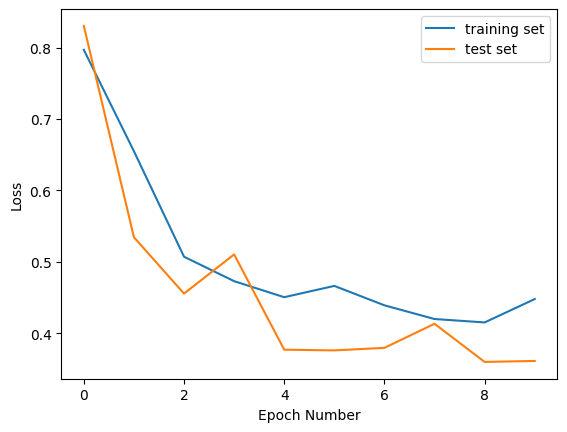

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(history.history['loss'], label='training set')
plt.plot(history.history['val_loss'], label='test set')
plt.legend()

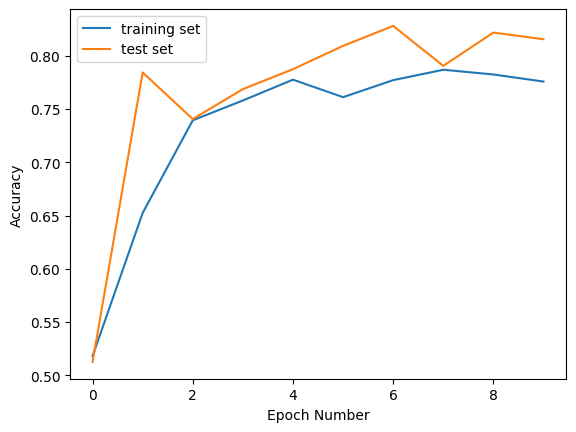

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label='training set')
plt.plot(history.history['val_accuracy'], label='test set')
plt.legend()

In [ ]:
train_loss, train_accuracy = model.evaluate(train_set_conv)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

37/37 [==============================] - 8s 226ms/step - loss: 0.3993 - accuracy: 0.7959
Training Accuracy: 79.59%


In [ ]:
test_loss, test_accuracy = model.evaluate(test_set_conv)
print(f"Validation Accuracy: {test_accuracy * 100:.2f}%")

11/11 [==============================] - 0s 14ms/step - loss: 0.4000 - accuracy: 0.7994
Validation Accuracy: 79.94%


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
#ResNet-50 model
def ResNet50(input_shape, num_classes):
    input_tensor = tf.keras.layers.Input(shape=input_shape)

    # Initial Convolution Layer
    x = tf.keras.layers.ZeroPadding2D(padding=(3, 3))(input_tensor)
    x = tf.keras.layers.Conv2D(64, (7, 7), strides=(2, 2), name='conv1')(x)
    x = tf.keras.layers.BatchNormalization(axis=3, name='bn_conv1')(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.ZeroPadding2D(padding=(1, 1))(x)
    x = tf.keras.layers.MaxPooling2D((3, 3), strides=(2, 2))(x)

    # ResNet-50 architecture
    x = tf.keras.layers.Conv2D(64, (1, 1), strides=(1, 1), name='conv2_1')(x)
    x = tf.keras.layers.BatchNormalization(axis=3, name='bn2_1')(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.Conv2D(64, (3, 3), strides=(1, 1), padding='same', name='conv2_2')(x)
    x = tf.keras.layers.BatchNormalization(axis=3, name='bn2_2')(x)
    x = tf.keras.layers.Activation('relu')(x)
    x = tf.keras.layers.Conv2D(256, (1, 1), strides=(1, 1), name='conv2_3')(x)
    x = tf.keras.layers.BatchNormalization(axis=3, name='bn2_3')(x)

    #shortcut
    shortcut = tf.keras.layers.Conv2D(256, (1, 1), strides=(1, 1), name='conv2_4')(x)
    shortcut = tf.keras.layers.BatchNormalization(axis=3, name='bn2_4')(shortcut)
    x = tf.keras.layers.Add()([x, shortcut])
    x = tf.keras.layers.Activation('relu')(x)

    # Fully Connected Layer
    x = tf.keras.layers.AveragePooling2D(pool_size=(7, 7), name='avg_pool')(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(num_classes, activation='softmax', name='fc1000')(x)

    model = models.Model(inputs=input_tensor, outputs=x, name='resnet50')

    return model

#ResNet-50 model
input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)
num_classes = 2
resnet50_model = ResNet50(input_shape, num_classes)

early_stopping = EarlyStopping(monitor='val_accuracy',  # You can choose 'val_loss' or other metrics
                               patience=10,             # Number of epochs with no improvement before stopping
                               restore_best_weights=True)
optimizer = Adam(learning_rate=0.00001)
resnet50_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
resnet50_model.summary()



Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 106, 106, 3)          0         ['input_3[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1 (Conv2D)              (None, 50, 50, 64)           9472      ['zero_padding2d[0][0]']      
                                                                                                  
 bn_conv1 (BatchNormalizati  (None, 50, 50, 64)           256       ['conv1[0][0]']        

In [ ]:
steps_per_epoch = len(x_train_normalized) // batch_size
validation_steps = len(x_val_normalized) // batch_size

# Train
training_history = resnet50_model.fit(
    train_set_conv,
    steps_per_epoch=steps_per_epoch,
    epochs=25,
    validation_data=valid_set_conv,
    validation_steps=validation_steps,
    callbacks=[early_stopping]
)


Epoch 1/25
36/36 [==============================] - 11s 182ms/step - loss: 0.7443 - accuracy: 0.5708 - val_loss: 0.6953 - val_accuracy: 0.4812
Epoch 2/25
36/36 [==============================] - 8s 218ms/step - loss: 0.5532 - accuracy: 0.7115 - val_loss: 0.6899 - val_accuracy: 0.5281
Epoch 3/25
36/36 [==============================] - 6s 166ms/step - loss: 0.4954 - accuracy: 0.7377 - val_loss: 0.6874 - val_accuracy: 0.5312
Epoch 4/25
36/36 [==============================] - 8s 214ms/step - loss: 0.4721 - accuracy: 0.7674 - val_loss: 0.6961 - val_accuracy: 0.5094
Epoch 5/25
36/36 [==============================] - 6s 167ms/step - loss: 0.4470 - accuracy: 0.7732 - val_loss: 0.7012 - val_accuracy: 0.5094
Epoch 6/25
36/36 [==============================] - 8s 218ms/step - loss: 0.4335 - accuracy: 0.7847 - val_loss: 0.6948 - val_accuracy: 0.5125
Epoch 7/25
36/36 [==============================] - 6s 162ms/step - loss: 0.4205 - accuracy: 0.7901 - val_loss: 0.6863 - val_accuracy: 0.5156
Epoch

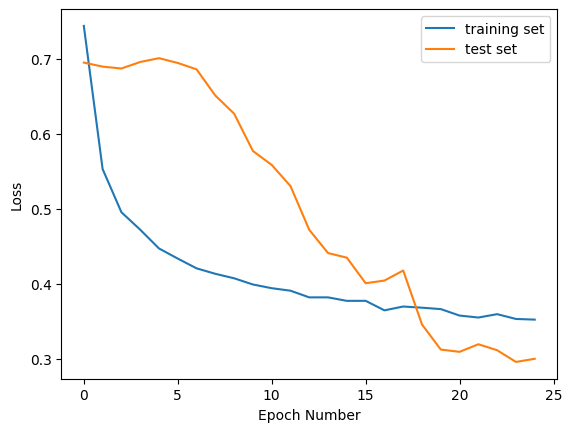

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='test set')
plt.legend()

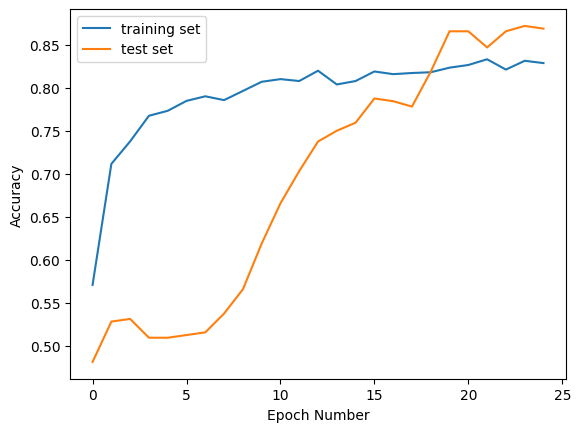

In [ ]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='test set')
plt.legend()

In [ ]:
# Evaluate the ResNet-50 model on the training set
train_loss, train_accuracy = resnet50_model.evaluate(train_set_conv, steps=len(x_train_normalized) // batch_size)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Evaluate the ResNet-50 model on the test set
test_loss, test_accuracy = resnet50_model.evaluate(test_set_conv)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

36/36 [==============================] - 6s 165ms/step - loss: 0.3481 - accuracy: 0.8368
Training Accuracy: 83.68%
11/11 [==============================] - 0s 21ms/step - loss: 0.3678 - accuracy: 0.8567
Test Accuracy: 85.67%


In [ ]:
# Extract features from ResNet-50
x_train_features = resnet50_model.predict(x_train_normalized)
x_val_features = resnet50_model.predict(x_val_normalized)
x_test_features = resnet50_model.predict(x_test_normalized)

21/21 [==============================] - 0s 6ms/step


In [ ]:
x_train_features = x_train_features.reshape(x_train_features.shape[0], -1)
x_val_features = x_val_features.reshape(x_val_features.shape[0], -1)
x_test_features = x_test_features.reshape(x_test_features.shape[0], -1)

In [ ]:
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['rbf', 'linear', 'poly']
}


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the SVM classifier
svm_model = SVC()

# Create GridSearchCV with the parameter grid and cross-validation
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=3, n_jobs=-1)

# Perform the grid search on the training data
grid_search.fit(x_train_features, y_train)

# Print the best hyperparameters found by the grid search
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best SVM model from the grid search
best_svm_model = grid_search.best_estimator_

# Evaluate the best model on the test data
y_pred_svm = best_svm_model.predict(x_test_features)

svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_svm).ravel()
svm_specificity = tn / (tn + fp)

print("SVM Accuracy:", svm_accuracy)
print("SVM Precision:", svm_precision)
print("SVM Sensitivity (Recall):", svm_recall)
print("SVM Specificity:", svm_specificity)
print("SVM F1 Score:", svm_f1)



Best Hyperparameters: {'C': 1, 'gamma': 0.01, 'kernel': 'linear'}
SVM Accuracy: 0.8582202111613876
SVM Precision: 0.8314285714285714
SVM Sensitivity (Recall): 0.8926380368098159
SVM Specificity: 0.8249258160237388
SVM F1 Score: 0.8609467455621301


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the parameter distributions for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['auto', 'sqrt']
}

# Instantiate the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Instantiate RandomizedSearchCV with the model, parameter distributions, and evaluation metric
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=50, cv=3, n_jobs=-1, random_state=42, scoring='accuracy')

# Early stopping parameters
max_epochs = 25  # Maximum number of epochs to train
patience = 5  # Number of epochs to wait for improvement
counter = 0  # Counter to keep track of epochs with no improvement
best_accuracy = 0  # Best validation accuracy

# Training loop with early stopping
for epoch in range(max_epochs):
    # Perform the randomized search on your training data (x_train_features, y_train)
    random_search.fit(x_train_features, y_train)

    # Get the best hyperparameters and best model
    best_params = random_search.best_params_
    best_rf_model = random_search.best_estimator_

    # Evaluate the model on the validation data
    y_pred_val = best_rf_model.predict(x_val_features)
    val_accuracy = accuracy_score(y_val, y_pred_val)

    print("Epoch {}: Validation Accuracy: {:.4f}".format(epoch, val_accuracy))

    # Check for improvement in validation accuracy
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        counter = 0
    else:
        counter += 1

    # Early stopping condition
    if counter >= patience:
        print("Early stopping after {} epochs of no improvement.".format(epoch))
        break

# Evaluate the best model on the test data (x_test_features, y_test)
y_pred_rf = best_rf_model.predict(x_test_features)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rf).ravel()
rf_specificity = tn / (tn + fp)

print("Best Hyperparameters:", best_params)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Precision:", rf_precision)
print("Random Forest Sensitivity (Recall):", rf_recall)
print("Random Forest Specificity:", rf_specificity)
print("Random Forest F1 Score:", rf_f1)





/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Epoch 0: Validation Accuracy: 0.8278


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Epoch 1: Validation Accuracy: 0.8278


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Epoch 2: Validation Accuracy: 0.8278


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Epoch 3: Validation Accuracy: 0.8278


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Epoch 4: Validation Accuracy: 0.8278


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Epoch 5: Validation Accuracy: 0.8278
Early stopping after 5 epochs of no improvement.
Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 20}
Random Forest Accuracy: 0.799396681749623
Random Forest Precision: 0.796923076923077
Random Forest Sensitivity (Recall): 0.7944785276073619
Random Forest Specificity: 0.8041543026706232
Random Forest F1 Score: 0.7956989247311829


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Instantiate the KNN classifier
knn_model = KNeighborsClassifier(n_neighbors=5)

# Early stopping parameters
max_epochs = 10  # Maximum number of epochs (iterations) to train
patience = 5  # Number of epochs to wait for improvement
best_accuracy = 0  # Best validation accuracy
counter = 0  # Counter to keep track of epochs with no improvement

# Training loop with early stopping
for epoch in range(max_epochs):
    # Train the KNN model
    knn_model.fit(x_train_features, y_train)

    # Validate the model on the validation data
    y_pred_val = knn_model.predict(x_val_features)
    val_accuracy = accuracy_score(y_val, y_pred_val)

    print("Epoch {}: Validation Accuracy: {:.4f}".format(epoch, val_accuracy))

    # Check for improvement in validation accuracy
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        counter = 0
    else:
        counter += 1

    # Early stopping condition
    if counter >= patience:
        print("Early stopping after {} epochs of no improvement.".format(epoch))
        break

# Evaluate the best model on the test data
y_pred_test = knn_model.predict(x_test_features)
knn_accuracy = accuracy_score(y_test, y_pred_test)
knn_precision = precision_score(y_test, y_pred_test)
knn_recall = recall_score(y_test, y_pred_test)
knn_f1 = f1_score(y_test, y_pred_test)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
knn_specificity = tn / (tn + fp)

print("KNN Accuracy:", knn_accuracy)
print("KNN Precision:", knn_precision)
print("KNN Sensitivity (Recall):", knn_recall)
print("KNN Specificity:", knn_specificity)
print("KNN F1 Score:", knn_f1)


Epoch 0: Validation Accuracy: 0.8308
Epoch 1: Validation Accuracy: 0.8308
Epoch 2: Validation Accuracy: 0.8308
Epoch 3: Validation Accuracy: 0.8308
Epoch 4: Validation Accuracy: 0.8308
Epoch 5: Validation Accuracy: 0.8308
Early stopping after 5 epochs of no improvement.
KNN Accuracy: 0.7963800904977375
KNN Precision: 0.790273556231003
KNN Sensitivity (Recall): 0.7975460122699386
KNN Specificity: 0.7952522255192879
KNN F1 Score: 0.7938931297709925


In [ ]:
import tensorflow as tf
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model


def VGG16(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    # Block 1
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(inputs)
    x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

    # Block 2
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

    # Block 3
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
    x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

    # Block 4
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

    # Block 5
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
    x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

    # Flatten and Fully Connected Layers
    x = Flatten(name='flatten')(x)
    x = Dense(4096, activation='relu', name='fc1')(x)
    x = Dropout(0.5)(x)
    x = Dense(4096, activation='relu', name='fc2')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(num_classes, activation='softmax', name='predictions')(x)

    # Create the model
    model = Model(inputs=inputs, outputs=predictions)
    return model

# Modify the input shape and number of classes based on your needs
input_shape = (100, 100, 3)
num_classes = 2

model = VGG16(input_shape, num_classes)

# Print model summary
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0     

In [ ]:
from tensorflow.keras.optimizers import Adam

# Define learning rate
learning_rate = 0.00001

# Compile the model with the specified learning rate
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define steps per epoch and validation steps
steps_per_epoch = len(x_train_normalized) // batch_size
validation_steps = len(x_val_normalized) // batch_size

# Train the VGG16 model
history = model.fit(
    train_set_conv,
    steps_per_epoch=steps_per_epoch,
    epochs=25,  # You can adjust the number of epochs
    validation_data=valid_set_conv,
    validation_steps=validation_steps
)







Epoch 1/25
36/36 [==============================] - 24s 320ms/step - loss: 0.6881 - accuracy: 0.5539 - val_loss: 0.6891 - val_accuracy: 0.5094
Epoch 2/25
36/36 [==============================] - 9s 253ms/step - loss: 0.6482 - accuracy: 0.5584 - val_loss: 0.6053 - val_accuracy: 0.5188
Epoch 3/25
36/36 [==============================] - 9s 255ms/step - loss: 0.5661 - accuracy: 0.6582 - val_loss: 0.4870 - val_accuracy: 0.7719
Epoch 4/25
36/36 [==============================] - 10s 281ms/step - loss: 0.4905 - accuracy: 0.7554 - val_loss: 0.4936 - val_accuracy: 0.7688
Epoch 5/25
36/36 [==============================] - 10s 279ms/step - loss: 0.4902 - accuracy: 0.7585 - val_loss: 0.3866 - val_accuracy: 0.8406
Epoch 6/25
36/36 [==============================] - 9s 246ms/step - loss: 0.4499 - accuracy: 0.7807 - val_loss: 0.3832 - val_accuracy: 0.8375
Epoch 7/25
36/36 [==============================] - 13s 351ms/step - loss: 0.4429 - accuracy: 0.7816 - val_loss: 0.3893 - val_accuracy: 0.8313
Ep

In [ ]:
# Evaluate the model on the training set
train_loss, train_accuracy = model.evaluate(train_set_conv, steps=steps_per_epoch)
print(f'Training Loss: {train_loss:.4f}')
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_set_conv)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')




36/36 [==============================] - 8s 232ms/step - loss: 0.3734 - accuracy: 0.8181
Training Loss: 0.3734
Training Accuracy: 81.81%
11/11 [==============================] - 2s 150ms/step - loss: 0.3870 - accuracy: 0.8431
Test Loss: 0.3870
Test Accuracy: 84.31%


In [ ]:
x_train_features = model.predict(x_train_normalized)
x_val_features = model.predict(x_val_normalized)
x_test_features = model.predict(x_test_normalized)

21/21 [==============================] - 1s 31ms/step


In [ ]:
x_train_features = x_train_features.reshape(x_train_features.shape[0], -1)
x_val_features = x_val_features.reshape(x_val_features.shape[0], -1)
x_test_features = x_test_features.reshape(x_test_features.shape[0], -1)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# SVM Classifier
svm_model = SVC(kernel='rbf', C=1, gamma='scale')

# Early stopping parameters
max_epochs = 25  # Maximum number of epochs (iterations) to train
patience = 5  # Number of epochs to wait for improvement
best_accuracy = 0  # Best validation accuracy
counter = 0  # Counter to keep track of epochs with no improvement

# Training loop with early stopping
for epoch in range(max_epochs):
    # Train the SVM model
    svm_model.fit(x_train_features, y_train)

    # Validate the model on the validation data
    y_pred_val = svm_model.predict(x_val_features)
    val_accuracy = accuracy_score(y_val, y_pred_val)

    print("Epoch {}: Validation Accuracy: {:.4f}".format(epoch, val_accuracy))

    # Check for improvement in validation accuracy
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        counter = 0
    else:
        counter += 1

    # Early stopping condition
    if counter >= patience:
        print("Early stopping after {} epochs of no improvement.".format(epoch))
        break

# Evaluate the best model on the test data
y_pred_test = svm_model.predict(x_test_features)
svm_accuracy = accuracy_score(y_test, y_pred_test)
svm_precision = precision_score(y_test, y_pred_test)
svm_recall = recall_score(y_test, y_pred_test)
svm_f1 = f1_score(y_test, y_pred_test)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
svm_specificity = tn / (tn + fp)

print("SVM Accuracy:", svm_accuracy)
print("SVM Precision:", svm_precision)
print("SVM Sensitivity (Recall):", svm_recall)
print("SVM Specificity:", svm_specificity)
print("SVM F1 Score:", svm_f1)


Epoch 0: Validation Accuracy: 0.8671
Epoch 1: Validation Accuracy: 0.8671
Epoch 2: Validation Accuracy: 0.8671
Epoch 3: Validation Accuracy: 0.8671
Epoch 4: Validation Accuracy: 0.8671
Epoch 5: Validation Accuracy: 0.8671
Early stopping after 5 epochs of no improvement.
SVM Accuracy: 0.8416289592760181
SVM Precision: 0.8060941828254847
SVM Sensitivity (Recall): 0.8926380368098159
SVM Specificity: 0.7922848664688428
SVM F1 Score: 0.8471615720524017


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# Define the parameter distributions for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['auto', 'sqrt']
}

# Instantiate the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Instantiate RandomizedSearchCV with the model, parameter distributions, and evaluation metric
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=50, cv=3, n_jobs=-1, random_state=42, scoring='accuracy')

# Perform the randomized search on your training data (x_train_features, y_train)
random_search.fit(x_train_features, y_train)

# Get the best hyperparameters and best model
best_params = random_search.best_params_
best_rf_model = random_search.best_estimator_

# Evaluate the best model on the test data (x_test_features, y_test)
y_pred_rf = best_rf_model.predict(x_test_features)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rf).ravel()
rf_specificity = tn / (tn + fp)

print("Best Hyperparameters:", best_params)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Precision:", rf_precision)
print("Random Forest Sensitivity (Recall):", rf_recall)
print("Random Forest Specificity:", rf_specificity)
print("Random Forest F1 Score:", rf_f1)



Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10}
Random Forest Accuracy: 0.8205128205128205
Random Forest Precision: 0.7965616045845272
Random Forest Sensitivity (Recall): 0.852760736196319
Random Forest Specificity: 0.7893175074183977
Random Forest F1 Score: 0.8237037037037037


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Example values for the number of neighbors
    'weights': ['uniform', 'distance'],  # Example values for the weight function
    'p': [1, 2]  # Example values for the power parameter (1 for Manhattan distance, 2 for Euclidean distance)
}

# Instantiate the KNN classifier
knn_model = KNeighborsClassifier()

# Instantiate GridSearchCV with the model and parameter grid
grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='accuracy')

# Perform grid search on your training data (x_train_features, y_train)
grid_search.fit(x_train_features, y_train)

# Get the best hyperparameters and best model
best_params = grid_search.best_params_
best_knn_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Evaluate the best model on the test data (x_test_features, y_test)
y_pred_knn = best_knn_model.predict(x_test_features)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn)
knn_recall = recall_score(y_test, y_pred_knn)
knn_f1 = f1_score(y_test, y_pred_knn)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_knn).ravel()
knn_specificity = tn / (tn + fp)

print("KNN Accuracy:", knn_accuracy)
print("KNN Precision:", knn_precision)
print("KNN Sensitivity (Recall):", knn_recall)
print("KNN Specificity:", knn_specificity)
print("KNN F1 Score:", knn_f1)

# The best trained KNN model is stored in the variable 'best_knn_model'


Best Hyperparameters: {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
KNN Accuracy: 0.8205128205128205
KNN Precision: 0.8
KNN Sensitivity (Recall): 0.8466257668711656
KNN Specificity: 0.7952522255192879
KNN F1 Score: 0.8226527570789867


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def ShuffleNet(input_shape, num_classes):
    def group(input, groups, in_channels, out_channels):
        group_list = []
        for i in range(groups):
            x = layers.Conv2D(out_channels // groups, (1, 1), use_bias=False)(input)
            x = layers.BatchNormalization()(x)
            x = layers.Activation('relu')(x)
            group_list.append(x)
        if groups == 1:
            return group_list[0]
        else:
            return layers.Concatenate()(group_list)

    def channel_shuffle(x, groups):
        _, width, height, channels = x.shape
        group_channels = channels // groups
        x = tf.reshape(x, [-1, width, height, group_channels, groups])
        x = tf.transpose(x, [0, 1, 2, 4, 3])
        x = tf.reshape(x, [-1, width, height, channels])
        return x

    input_tensor = tf.keras.layers.Input(shape=input_shape)
    x = layers.Conv2D(24, (3, 3), strides=(2, 2), padding='same', use_bias=False)(input_tensor)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    x = group(x, 4, 24, 384)
    x = layers.Conv2D(196, (1, 1), use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = channel_shuffle(x, 4)
    x = layers.DepthwiseConv2D((3, 3), padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(196, (1, 1), use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = group(x, 4, 196, 384)
    x = layers.Conv2D(392, (1, 1), use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = channel_shuffle(x, 4)
    x = layers.DepthwiseConv2D((3, 3), padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(392, (1, 1), use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = group(x, 4, 392, 784)
    x = layers.Conv2D(196, (1, 1), use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = channel_shuffle(x, 4)
    x = layers.DepthwiseConv2D((3, 3), padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(196, (1, 1), use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs=input_tensor, outputs=x, name='shufflenet')

    return model

input_shape = (100, 100, 3)
num_classes = 2
shufflenet_model = ShuffleNet(input_shape, num_classes)

# Compile model
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.00001)
shufflenet_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

shufflenet_model.summary()

Model: "shufflenet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 conv2d_130 (Conv2D)         (None, 50, 50, 24)           648       ['input_5[0][0]']             
                                                                                                  
 batch_normalization_130 (B  (None, 50, 50, 24)           96        ['conv2d_130[0][0]']          
 atchNormalization)                                                                               
                                                                                                  
 activation_4 (Activation)   (None, 50, 50, 24)           0         ['batch_normalization

In [ ]:
from tensorflow.keras.optimizers import Adam


# Define steps per epoch and validation steps
steps_per_epoch = len(x_train_normalized) // batch_size
validation_steps = len(x_val_normalized) // batch_size

# Train the model
history = shufflenet_model.fit(
    train_set_conv,
    steps_per_epoch=steps_per_epoch,
    epochs=25,  # You can adjust the number of epochs
    validation_data=valid_set_conv,
    validation_steps=validation_steps
)

Epoch 1/25
36/36 [==============================] - 22s 241ms/step - loss: 1.1040 - accuracy: 0.4376 - val_loss: 0.6937 - val_accuracy: 0.4750
Epoch 2/25
36/36 [==============================] - 10s 263ms/step - loss: 0.9024 - accuracy: 0.5411 - val_loss: 0.6936 - val_accuracy: 0.4875
Epoch 3/25
36/36 [==============================] - 10s 265ms/step - loss: 0.7912 - accuracy: 0.6622 - val_loss: 0.6938 - val_accuracy: 0.4781
Epoch 4/25
36/36 [==============================] - 8s 225ms/step - loss: 0.7294 - accuracy: 0.7124 - val_loss: 0.6932 - val_accuracy: 0.4844
Epoch 5/25
36/36 [==============================] - 10s 264ms/step - loss: 0.6587 - accuracy: 0.7408 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/25
36/36 [==============================] - 10s 271ms/step - loss: 0.6111 - accuracy: 0.7679 - val_loss: 0.6928 - val_accuracy: 0.5125
Epoch 7/25
36/36 [==============================] - 8s 223ms/step - loss: 0.5780 - accuracy: 0.7790 - val_loss: 0.6922 - val_accuracy: 0.5219
E

In [ ]:
# Evaluate the model on the training data
train_loss, train_accuracy = shufflenet_model.evaluate(train_set_conv, steps=steps_per_epoch)
print(f"Training Loss: {train_loss:.4f}")
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Evaluate the model on the test data
test_loss, test_accuracy = shufflenet_model.evaluate(test_set_conv, steps=validation_steps)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")




36/36 [==============================] - 11s 317ms/step - loss: 0.3513 - accuracy: 0.8359
Training Loss: 0.3513
Training Accuracy: 83.59%
5/5 [==============================] - 0s 60ms/step - loss: 0.3635 - accuracy: 0.8500
Test Loss: 0.3635
Test Accuracy: 85.00%


In [ ]:
x_train_features = shufflenet_model.predict(x_train_normalized)
x_val_features = shufflenet_model.predict(x_val_normalized)
x_test_features = shufflenet_model.predict(x_test_normalized)

21/21 [==============================] - 1s 38ms/step


In [ ]:
x_train_features = x_train_features.reshape(x_train_features.shape[0], -1)
x_val_features = x_val_features.reshape(x_val_features.shape[0], -1)
x_test_features = x_test_features.reshape(x_test_features.shape[0], -1)

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],  # Example values for the regularization parameter
    'gamma': ['scale', 'auto', 0.1, 1]  # Example values for the kernel coefficient (gamma) parameter
}

# Instantiate the SVM classifier
svm_model = SVC(kernel='rbf')

# Early stopping parameters
max_epochs = 25  # Maximum number of epochs (iterations) to train
patience = 5  # Number of epochs to wait for improvement
best_accuracy = 0  # Best validation accuracy
counter = 0  # Counter to keep track of epochs with no improvement

# Training loop with early stopping and hyperparameter tuning using GridSearchCV
for epoch in range(max_epochs):
    # Perform grid search on your training data (x_train_features, y_train)
    grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='accuracy')
    grid_search.fit(x_train_features, y_train)

    # Get the best hyperparameters and best model
    best_params = grid_search.best_params_
    best_svm_model = grid_search.best_estimator_

    # Validate the best model on the validation data
    y_pred_val = best_svm_model.predict(x_val_features)
    val_accuracy = accuracy_score(y_val, y_pred_val)

    print("Epoch {}: Validation Accuracy: {:.4f}".format(epoch, val_accuracy))

    # Check for improvement in validation accuracy
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        counter = 0
    else:
        counter += 1

    # Early stopping condition
    if counter >= patience:
        print("Early stopping after {} epochs of no improvement.".format(epoch))
        break

# Evaluate the best model on the test data
y_pred_svm = best_svm_model.predict(x_test_features)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_svm).ravel()
svm_specificity = tn / (tn + fp)

print("Best Hyperparameters:", best_params)
print("SVM Accuracy:", svm_accuracy)
print("SVM Precision:", svm_precision)
print("SVM Sensitivity (Recall):", svm_recall)
print("SVM Specificity:", svm_specificity)
print("SVM F1 Score:", svm_f1)


Epoch 0: Validation Accuracy: 0.8731
Epoch 1: Validation Accuracy: 0.8731
Epoch 2: Validation Accuracy: 0.8731
Epoch 3: Validation Accuracy: 0.8731
Epoch 4: Validation Accuracy: 0.8731
Epoch 5: Validation Accuracy: 0.8731
Early stopping after 5 epochs of no improvement.
Best Hyperparameters: {'C': 1, 'gamma': 1}
SVM Accuracy: 0.8431372549019608
SVM Precision: 0.8016304347826086
SVM Sensitivity (Recall): 0.9049079754601227
SVM Specificity: 0.7833827893175074
SVM F1 Score: 0.8501440922190201


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, cross_val_score

# Define a wider range of hyperparameters for the grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(x_train_features, y_train)

# Get the best hyperparameters and best model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

# Evaluate the best model using cross-validation
cv_scores = cross_val_score(best_rf_model, x_train_features, y_train, cv=5, scoring='accuracy')
mean_cv_accuracy = cv_scores.mean()

# Evaluate the best model on the test data
y_pred_rf = best_rf_model.predict(x_test_features)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rf).ravel()
rf_specificity = tn / (tn + fp)

print("Best Hyperparameters:", best_params)
print("Mean Cross-Validation Accuracy:", mean_cv_accuracy)
print("Random Forest Accuracy on Test Data:", rf_accuracy)
print("Random Forest Precision:", rf_precision)
print("Random Forest Sensitivity (Recall):", rf_recall)
print("Random Forest Specificity:", rf_specificity)
print("Random Forest F1 Score:", rf_f1)


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Mean Cross-Validation Accuracy: 0.8114033291129813
Random Forest Accuracy on Test Data: 0.8295625942684767
Random Forest Precision: 0.8016997167138811
Random Forest Sensitivity (Recall): 0.8680981595092024
Random Forest Specificity: 0.7922848664688428
Random Forest F1 Score: 0.8335787923416791


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score

# Define a wider range of neighbors for RandomizedSearchCV
param_dist = {
    'n_neighbors': list(range(1, 101))  # Experiment with a wider range of neighbors (1 to 100)
}

# Instantiate the KNN Classifier
knn_model = KNeighborsClassifier()

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=knn_model, param_distributions=param_dist, n_iter=30, cv=3, n_jobs=-1, scoring='accuracy')

# Fit the randomized search to the data
random_search.fit(x_train_features, y_train)

# Get the best hyperparameters and best model
best_params = random_search.best_params_
best_knn_model = random_search.best_estimator_

# Evaluate the best model using cross-validation
cv_scores = cross_val_score(best_knn_model, x_train_features, y_train, cv=5, scoring='accuracy')
mean_cv_accuracy = cv_scores.mean()

# Evaluate the best model on the test data
y_pred_knn = best_knn_model.predict(x_test_features)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn)
knn_recall = recall_score(y_test, y_pred_knn)
knn_f1 = f1_score(y_test, y_pred_knn)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_knn).ravel()
knn_specificity = tn / (tn + fp)

print("Best Hyperparameters:", best_params)
print("Mean Cross-Validation Accuracy:", mean_cv_accuracy)
print("KNN Accuracy on Test Data:", knn_accuracy)
print("KNN Precision:", knn_precision)
print("KNN Sensitivity (Recall):", knn_recall)
print("KNN Specificity:", knn_specificity)
print("KNN F1 Score:", knn_f1)



Best Hyperparameters: {'n_neighbors': 92}
Mean Cross-Validation Accuracy: 0.8355673270276309
KNN Accuracy on Test Data: 0.8401206636500754
KNN Precision: 0.7941176470588235
KNN Sensitivity (Recall): 0.911042944785276
KNN Specificity: 0.771513353115727
KNN F1 Score: 0.8485714285714285


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, DepthwiseConv2D, BatchNormalization, ReLU, GlobalAveragePooling2D, Dense

def MobileNetCustom(input_shape, num_classes):
    input_tensor = Input(shape=input_shape)

    # Initial Convolution Layer
    x = Conv2D(32, (3, 3), strides=(2, 2), padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    # Depthwise Convolution Blocks
    def depthwise_block(x, filters, strides):
        x = DepthwiseConv2D((3, 3), strides=strides, padding='same')(x)
        x = BatchNormalization()(x)
        x = ReLU()(x)
        x = Conv2D(filters, (1, 1), padding='same')(x)
        x = BatchNormalization()(x)
        x = ReLU()(x)
        return x

    x = depthwise_block(x, 64, (1, 1))
    x = depthwise_block(x, 128, (2, 2))
    x = depthwise_block(x, 128, (1, 1))
    x = depthwise_block(x, 256, (2, 2))
    x = depthwise_block(x, 256, (1, 1))
    x = depthwise_block(x, 512, (2, 2))

    # Global Average Pooling
    x = GlobalAveragePooling2D()(x)

    # Fully Connected Layer
    x = Dense(num_classes, activation='softmax')(x)

    model = tf.keras.Model(inputs=input_tensor, outputs=x)

    return model

input_shape = (100, 100, 3)
num_classes = 2
mobilenet_custom_model = MobileNetCustom(input_shape, num_classes)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)
mobilenet_custom_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_accuracy',  # You can choose 'val_loss' or other metrics
                               patience=10,             # Number of epochs with no improvement before stopping
                               restore_best_weights=True)

mobilenet_custom_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 conv2d_156 (Conv2D)         (None, 50, 50, 32)        896       
                                                                 
 batch_normalization_165 (B  (None, 50, 50, 32)        128       
 atchNormalization)                                              
                                                                 
 re_lu_111 (ReLU)            (None, 50, 50, 32)        0         
                                                                 
 depthwise_conv2d_9 (Depthw  (None, 50, 50, 32)        320       
 iseConv2D)                                                      
                                                                 
 batch_normalization_166 (B  (None, 50, 50, 32)        128 

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Perform hyperparameter tuning with early stopping
best_accuracy = 0
best_hyperparameters = None

for epoch in range(25):
    # Train the model with the current hyperparameters
    training_history = mobilenet_custom_model.fit(
        train_set_conv,
        steps_per_epoch=steps_per_epoch,
        epochs=1,  # Train for one epoch at a time
        validation_data=valid_set_conv,
        validation_steps=validation_steps,
        callbacks=[early_stopping]
    )

    # Get the validation accuracy from the training history
    val_accuracy = training_history.history['val_accuracy'][0]

    # Check for improvement in validation accuracy
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_hyperparameters = mobilenet_custom_model.get_config()  # Save the best hyperparameters

    print("Epoch {}: Validation Accuracy: {:.4f}".format(epoch, val_accuracy))

    # Early stopping condition
    if early_stopping.stopped_epoch > 0:
        print("Early stopping after {} epochs of no improvement.".format(early_stopping.stopped_epoch))
        break

# Evaluate the model with the best hyperparameters on the test data
test_accuracy = mobilenet_custom_model.evaluate(test_set_conv)[1]
print("Best Validation Accuracy:", best_accuracy)
print("Test Accuracy with Best Hyperparameters:", test_accuracy)
print("Best Hyperparameters:", best_hyperparameters)



36/36 [==============================] - 13s 377ms/step - loss: 0.4616 - accuracy: 0.7723 - val_loss: 0.9020 - val_accuracy: 0.5219
Epoch 0: Validation Accuracy: 0.5219
36/36 [==============================] - 6s 174ms/step - loss: 0.4395 - accuracy: 0.7932 - val_loss: 0.9890 - val_accuracy: 0.5156
Epoch 1: Validation Accuracy: 0.5156
36/36 [==============================] - 6s 173ms/step - loss: 0.4350 - accuracy: 0.7949 - val_loss: 1.0833 - val_accuracy: 0.5156
Epoch 2: Validation Accuracy: 0.5156
36/36 [==============================] - 8s 229ms/step - loss: 0.4248 - accuracy: 0.7958 - val_loss: 1.1667 - val_accuracy: 0.5219
Epoch 3: Validation Accuracy: 0.5219
36/36 [==============================] - 6s 172ms/step - loss: 0.4118 - accuracy: 0.7914 - val_loss: 1.2757 - val_accuracy: 0.5125
Epoch 4: Validation Accuracy: 0.5125
36/36 [==============================] - 8s 233ms/step - loss: 0.4136 - accuracy: 0.7887 - val_loss: 1.3103 - val_accuracy: 0.5250
Epoch 5: Validation Accuracy

In [ ]:
# Evaluate the model on the training data
train_loss, train_accuracy = mobilenet_custom_model.evaluate(train_set_conv, steps=steps_per_epoch)
print(f"Training Loss: {train_loss:.4f}")
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Evaluate the model on the test data
test_loss, test_accuracy = mobilenet_custom_model.evaluate(test_set_conv, steps=validation_steps)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


36/36 [==============================] - 6s 176ms/step - loss: 0.3679 - accuracy: 0.8173
Training Loss: 0.3679
Training Accuracy: 81.73%
5/5 [==============================] - 0s 19ms/step - loss: 0.3170 - accuracy: 0.8813
Test Loss: 0.3170
Test Accuracy: 88.13%


In [ ]:
x_train_features = mobilenet_custom_model.predict(x_train_normalized)
x_val_features = mobilenet_custom_model.predict(x_val_normalized)
x_test_features = mobilenet_custom_model.predict(x_test_normalized)

21/21 [==============================] - 0s 6ms/step


In [ ]:
x_train_features = x_train_features.reshape(x_train_features.shape[0], -1)
x_val_features = x_val_features.reshape(x_val_features.shape[0], -1)
x_test_features = x_test_features.reshape(x_test_features.shape[0], -1)

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
pip install scikit-optimize


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 2.3 MB/s eta 0:00:00


In [ ]:
# Support Vector Machine (SVM) with L2 Regularization-like behavior
svm_model = SVC(kernel='rbf', C=4.5, gamma=0.006184517020465486)  # Set a smaller C for L2 regularization
svm_model.fit(x_train_features, y_train)
y_pred_svm = svm_model.predict(x_test_features)

svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_svm).ravel()
svm_specificity = tn / (tn + fp)

print("SVM Accuracy:", svm_accuracy)
print("SVM Precision:", svm_precision)
print("SVM Sensitivity (Recall):", svm_recall)
print("SVM Specificity:", svm_specificity)
print("SVM F1 Score:", svm_f1)


SVM Accuracy: 0.8461538461538461
SVM Precision: 0.788659793814433
SVM Sensitivity (Recall): 0.9386503067484663
SVM Specificity: 0.7566765578635015
SVM F1 Score: 0.8571428571428571


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Instantiate the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(x_train_features, y_train)

# Get the best hyperparameters and best model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

# Evaluate the best model on the test data
y_pred_rf = best_rf_model.predict(x_test_features)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rf).ravel()
rf_specificity = tn / (tn + fp)

print("Best Hyperparameters:", best_params)
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Precision:", rf_precision)
print("Random Forest Sensitivity (Recall):", rf_recall)
print("Random Forest Specificity:", rf_specificity)
print("Random Forest F1 Score:", rf_f1)


Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Random Forest Accuracy: 0.8099547511312217
Random Forest Precision: 0.7941176470588235
Random Forest Sensitivity (Recall): 0.8282208588957055
Random Forest Specificity: 0.7922848664688428
Random Forest F1 Score: 0.8108108108108107


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11]  # Example values for the number of neighbors (k)
}

# Instantiate the KNN Classifier
knn_model = KNeighborsClassifier()

# Early stopping parameters
max_epochs = 25  # Maximum number of epochs (iterations) to train
patience = 5  # Number of epochs to wait for improvement
best_accuracy = 0  # Best validation accuracy
counter = 0  # Counter to keep track of epochs with no improvement

# Training loop with early stopping and hyperparameter tuning using GridSearchCV
for epoch in range(max_epochs):
    # Perform grid search on your training data (x_train_features, y_train)
    grid_search = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='accuracy')
    grid_search.fit(x_train_features, y_train)

    # Get the best hyperparameters and best model
    best_params = grid_search.best_params_
    best_knn_model = grid_search.best_estimator_

    # Validate the best model on the validation data
    y_pred_val = best_knn_model.predict(x_val_features)
    val_accuracy = accuracy_score(y_val, y_pred_val)

    print("Epoch {}: Validation Accuracy: {:.4f}".format(epoch, val_accuracy))

    # Check for improvement in validation accuracy
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        counter = 0
    else:
        counter += 1

    # Early stopping condition
    if counter >= patience:
        print("Early stopping after {} epochs of no improvement.".format(epoch))
        break

# Evaluate the best model on the test data
y_pred_knn = best_knn_model.predict(x_test_features)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn)
knn_recall = recall_score(y_test, y_pred_knn)
knn_f1 = f1_score(y_test, y_pred_knn)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_knn).ravel()
knn_specificity = tn / (tn + fp)

print("Best Hyperparameters:", best_params)
print("KNN Accuracy on Test Data:", knn_accuracy)
print("KNN Precision:", knn_precision)
print("KNN Sensitivity (Recall):", knn_recall)
print("KNN Specificity:", knn_specificity)
print("KNN F1 Score:", knn_f1)


Epoch 0: Validation Accuracy: 0.8097
Epoch 1: Validation Accuracy: 0.8097
Epoch 2: Validation Accuracy: 0.8097
Epoch 3: Validation Accuracy: 0.8097
Epoch 4: Validation Accuracy: 0.8097
Epoch 5: Validation Accuracy: 0.8097
Early stopping after 5 epochs of no improvement.
Best Hyperparameters: {'n_neighbors': 7}
KNN Accuracy on Test Data: 0.8114630467571644
KNN Precision: 0.793002915451895
KNN Sensitivity (Recall): 0.8343558282208589
KNN Specificity: 0.7893175074183977
KNN F1 Score: 0.8131539611360239


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, GlobalAveragePooling2D, Dense, AveragePooling2D, Concatenate

# Define your input shape and number of classes
IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS = 100, 100, 3
NUM_CLASSES = 2

# Define the dense block
def dense_block(x, growth_rate):
    x1 = BatchNormalization()(x)
    x1 = Activation('relu')(x1)
    x1 = Conv2D(4 * growth_rate, (1, 1), padding='same')(x1)

    x1 = BatchNormalization()(x1)
    x1 = Activation('relu')(x1)
    x1 = Conv2D(growth_rate, (3, 3), padding='same')(x1)

    x = Concatenate()([x, x1])
    return x

# Define the transition layer
def transition_block(x, reduction):
    num_filters = int(x.shape[-1])
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(int(num_filters * reduction), (1, 1), padding='same')(x)
    x = AveragePooling2D((2, 2), strides=(2, 2))(x)
    return x

# Define the input shape
input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)
input_tensor = Input(shape=input_shape)

# Initial Convolution
x = Conv2D(64, (7, 7), strides=(2, 2), padding='same')(input_tensor)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

# Dense Blocks
for _ in range(6):
    x = dense_block(x, 32)

x = transition_block(x, 0.5)

for _ in range(12):
    x = dense_block(x, 32)

x = transition_block(x, 0.5)

for _ in range(48):
    x = dense_block(x, 32)

# Global Average Pooling
x = GlobalAveragePooling2D()(x)

# Fully Connected Layer
output = Dense(NUM_CLASSES, activation='softmax')(x)

# Create the model
model = Model(inputs=input_tensor, outputs=output)

# Compile the model with a learning rate of 0.00001
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()




Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 50, 50, 64)           9472      ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 50, 50, 64)           256       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 50, 50, 64)           0         ['batch_normalization[0][0

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

learning_rate = 0.00001
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])



# Define steps per epoch and validation steps
steps_per_epoch = len(x_train_normalized) // batch_size
validation_steps = len(x_val_normalized) // batch_size

# Train the model with early stopping
history = model.fit(
    train_set_conv,
    steps_per_epoch=steps_per_epoch,
    epochs=25,  # You can adjust the number of epochs
    validation_data=valid_set_conv,
    validation_steps=validation_steps,

)

Epoch 1/25
36/36 [==============================] - 97s 354ms/step - loss: 0.4499 - accuracy: 0.7763 - val_loss: 0.6934 - val_accuracy: 0.4812
Epoch 2/25
36/36 [==============================] - 9s 254ms/step - loss: 0.4092 - accuracy: 0.8065 - val_loss: 0.6915 - val_accuracy: 0.5188
Epoch 3/25
36/36 [==============================] - 10s 278ms/step - loss: 0.3849 - accuracy: 0.8047 - val_loss: 0.6947 - val_accuracy: 0.5156
Epoch 4/25
36/36 [==============================] - 10s 289ms/step - loss: 0.3706 - accuracy: 0.8162 - val_loss: 0.7161 - val_accuracy: 0.5125
Epoch 5/25
36/36 [==============================] - 9s 244ms/step - loss: 0.3539 - accuracy: 0.8362 - val_loss: 0.7095 - val_accuracy: 0.5250
Epoch 6/25
36/36 [==============================] - 10s 277ms/step - loss: 0.3551 - accuracy: 0.8265 - val_loss: 0.7073 - val_accuracy: 0.5250
Epoch 7/25
36/36 [==============================] - 11s 291ms/step - loss: 0.3498 - accuracy: 0.8327 - val_loss: 0.7053 - val_accuracy: 0.5844
E

In [ ]:
# Evaluate the model on the training data
train_loss, train_accuracy = model.evaluate(train_set_conv, steps=steps_per_epoch)
print(f"Training Loss: {train_loss:.4f}")
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_set_conv, steps=validation_steps)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


36/36 [==============================] - 7s 190ms/step - loss: 0.2846 - accuracy: 0.8668
Training Loss: 0.2846
Training Accuracy: 86.68%
5/5 [==============================] - 0s 87ms/step - loss: 0.3132 - accuracy: 0.8625
Test Loss: 0.3132
Test Accuracy: 86.25%


In [ ]:
x_train_features = model.predict(x_train_normalized)
x_val_features = model.predict(x_val_normalized)
x_test_features = model.predict(x_test_normalized)

21/21 [==============================] - 2s 110ms/step


In [ ]:
x_train_features = x_train_features.reshape(x_train_features.shape[0], -1)
x_val_features = x_val_features.reshape(x_val_features.shape[0], -1)
x_test_features = x_test_features.reshape(x_test_features.shape[0], -1)

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
# Support Vector Machine (SVM)
svm_model = SVC(kernel='rbf', C=4, gamma='scale')
svm_model.fit(x_train_features, y_train)
y_pred_svm = svm_model.predict(x_test_features)

svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_svm).ravel()
svm_specificity = tn / (tn + fp)

print("SVM Accuracy:", svm_accuracy)
print("SVM Precision:", svm_precision)
print("SVM Sensitivity (Recall):", svm_recall)
print("SVM Specificity:", svm_specificity)
print("SVM F1 Score:", svm_f1)


SVM Accuracy: 0.8733031674208145
SVM Precision: 0.8558823529411764
SVM Sensitivity (Recall): 0.8926380368098159
SVM Specificity: 0.8545994065281899
SVM F1 Score: 0.8738738738738737


In [ ]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train_features, y_train)
y_pred_rf = rf_model.predict(x_test_features)

rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rf).ravel()
rf_specificity = tn / (tn + fp)

print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Precision:", rf_precision)
print("Random Forest Sensitivity (Recall):", rf_recall)
print("Random Forest Specificity:", rf_specificity)
print("Random Forest F1 Score:", rf_f1)

Random Forest Accuracy: 0.8310708898944194
Random Forest Precision: 0.842948717948718
Random Forest Sensitivity (Recall): 0.8067484662576687
Random Forest Specificity: 0.8545994065281899
Random Forest F1 Score: 0.8244514106583071


In [ ]:
# K-Nearest Neighbors Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train_features, y_train)
y_pred_knn = knn_model.predict(x_test_features)

knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn)
knn_recall = recall_score(y_test, y_pred_knn)
knn_f1 = f1_score(y_test, y_pred_knn)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_knn).ravel()
knn_specificity = tn / (tn + fp)

print("KNN Accuracy:", knn_accuracy)
print("KNN Precision:", knn_precision)
print("KNN Sensitivity (Recall):", knn_recall)
print("KNN Specificity:", knn_specificity)
print("KNN F1 Score:", knn_f1)

KNN Accuracy: 0.8567119155354449
KNN Precision: 0.851063829787234
KNN Sensitivity (Recall): 0.8588957055214724
KNN Specificity: 0.8545994065281899
KNN F1 Score: 0.8549618320610687


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, DepthwiseConv2D, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

# Define input shape
input_shape = (100, 100, 3)  # Assuming input images have shape (224, 224, 3)
num_classes = 2  # Number of output classes

# Build ResNet50-like architecture
def build_resnet50(input_shape):
    input_tensor = Input(shape=input_shape)

    # Initial convolutional layer
    x = Conv2D(64, (7, 7), strides=(2, 2), padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    # Residual blocks
    x = resnet_block(x, filters=[64, 64, 256], strides=1, block_name='block1')
    x = resnet_block(x, filters=[128, 128, 512], strides=2, block_name='block2')
    x = resnet_block(x, filters=[256, 256, 1024], strides=2, block_name='block3')
    x = resnet_block(x, filters=[512, 512, 2048], strides=2, block_name='block4')

    # Global Average Pooling
    x = GlobalAveragePooling2D()(x)

    return Model(inputs=input_tensor, outputs=x)

# Define MobileNet-like architecture
def build_mobilenet(input_shape):
    input_tensor = Input(shape=input_shape)

    # Initial depthwise separable convolution
    x = DepthwiseConv2D((3, 3), strides=(2, 2), padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    # Depthwise separable convolutions
    x = mobilenet_block(x, filters=128, strides=1, block_name='block1')
    x = mobilenet_block(x, filters=256, strides=2, block_name='block2')
    x = mobilenet_block(x, filters=512, strides=2, block_name='block3')
    x = mobilenet_block(x, filters=1024, strides=2, block_name='block4')

    # Global Average Pooling
    x = GlobalAveragePooling2D()(x)

    return Model(inputs=input_tensor, outputs=x)

# ResNet block
def resnet_block(input_tensor, filters, strides, block_name):
    x = Conv2D(filters[0], (1, 1), strides=strides, padding='same', name=block_name+'_conv1')(input_tensor)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = Conv2D(filters[1], (3, 3), padding='same', name=block_name+'_conv2')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = Conv2D(filters[2], (1, 1), padding='same', name=block_name+'_conv3')(x)
    x = BatchNormalization()(x)

    # Shortcut connection
    shortcut = Conv2D(filters[2], (1, 1), strides=strides, padding='same', name=block_name+'_shortcut')(input_tensor)
    shortcut = BatchNormalization()(shortcut)

    # Add shortcut to the output
    x = tf.keras.layers.add([x, shortcut])
    x = ReLU()(x)

    return x

# MobileNet block
def mobilenet_block(input_tensor, filters, strides, block_name):
    x = DepthwiseConv2D((3, 3), strides=strides, padding='same', name=block_name+'_depthwise')(input_tensor)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = Conv2D(filters, (1, 1), padding='same', name=block_name+'_pointwise')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    return x

# Build ResNet50 model
resnet_model = build_resnet50(input_shape)

# Build MobileNet model
mobilenet_model = build_mobilenet(input_shape)

# Concatenate the output tensors from ResNet50 and MobileNet
concatenated_output = tf.keras.layers.Concatenate()([resnet_model.output, mobilenet_model.output])

# Add custom dense layers for classification with regularization
dense_layer = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(concatenated_output)
dense_layer = Dropout(0.5)(dense_layer)  # Adding dropout with a rate of 0.5

output_layer = Dense(num_classes, activation='softmax', kernel_regularizer=l2(0.001))(dense_layer)

# Create the hybrid model with regularization
hybrid_model_regularized = Model(inputs=[resnet_model.input, mobilenet_model.input], outputs=output_layer)

# Compile the model
hybrid_model_regularized.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print summary of the model architecture
hybrid_model_regularized.summary()


Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 50, 50, 64)           9472      ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 50, 50, 64)           256       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 re_lu (ReLU)                (None, 50, 50, 64)           0         ['batch_normalization[0]

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout

# Assuming you have your optimizer, data, and other parameters defined

learning_rate = 0.00001
optimizer = Adam(learning_rate=learning_rate)

# ... (Define x_train_normalized, x_val_normalized, y_train, y_val, batch_size, etc.)

# Build the hybrid model with regularization (using previously modified code)
# ... (Code for building the model as previously shown)

# Compile the model
hybrid_model_regularized.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

epochs = 25

# Train the regularized model
history_regularized = hybrid_model_regularized.fit(
    [x_train_normalized, x_train_normalized],
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=([x_val_normalized, x_val_normalized], y_val)
)


Epoch 1/25
37/37 [==============================] - 45s 317ms/step - loss: 0.7934 - accuracy: 0.7173 - val_loss: 0.9422 - val_accuracy: 0.5166
Epoch 2/25
37/37 [==============================] - 8s 222ms/step - loss: 0.6879 - accuracy: 0.7730 - val_loss: 0.9536 - val_accuracy: 0.5166
Epoch 3/25
37/37 [==============================] - 8s 227ms/step - loss: 0.6469 - accuracy: 0.8140 - val_loss: 0.9788 - val_accuracy: 0.5166
Epoch 4/25
37/37 [==============================] - 8s 226ms/step - loss: 0.6221 - accuracy: 0.8218 - val_loss: 0.9897 - val_accuracy: 0.5166
Epoch 5/25
37/37 [==============================] - 9s 230ms/step - loss: 0.6059 - accuracy: 0.8274 - val_loss: 0.9630 - val_accuracy: 0.5166
Epoch 6/25
37/37 [==============================] - 8s 228ms/step - loss: 0.5823 - accuracy: 0.8386 - val_loss: 0.9333 - val_accuracy: 0.5166
Epoch 7/25
37/37 [==============================] - 9s 232ms/step - loss: 0.5798 - accuracy: 0.8416 - val_loss: 0.8968 - val_accuracy: 0.5378
Epoch

In [ ]:
# Evaluate on the training set
train_evaluation = hybrid_model_regularized.evaluate([x_train_normalized, x_train_normalized], y_train)
train_loss = train_evaluation[0]
train_accuracy = train_evaluation[1]

print(f"Training Loss: {train_loss:.4f}")
print(f"Training Accuracy: {train_accuracy:.4f}")

# Evaluate on the test set
test_evaluation = hybrid_model_regularized.evaluate([x_test_normalized, x_test_normalized], y_test)
test_loss = test_evaluation[0]
test_accuracy = test_evaluation[1]

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


73/73 [==============================] - 4s 37ms/step - loss: 0.3469 - accuracy: 0.9763
Training Loss: 0.3469
Training Accuracy: 0.9763
21/21 [==============================] - 1s 69ms/step - loss: 0.5338 - accuracy: 0.8733
Test Loss: 0.5338
Test Accuracy: 0.8733


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an instance of ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    rotation_range=20,  # Random rotation within the range of (-20, 20) degrees
    width_shift_range=0.1,  # Randomly shift images horizontally (10% of total width)
    height_shift_range=0.1,  # Randomly shift images vertically (10% of total height)
    shear_range=0.2,  # Shear intensity (20%)
    zoom_range=0.2,  # Zoom randomly within 20% range
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'  # Strategy for filling in newly created pixels
)

# Fit the ImageDataGenerator on your original training data
datagen.fit(x_train_normalized)

# Define the number of augmented images you want to generate
num_augmented_images = 1000  # Modify this based on your requirement

# Generate augmented images using the ImageDataGenerator
augmented_data = datagen.flow(x_train_normalized, y_train, batch_size=num_augmented_images)

# Retrieve augmented images and labels
x_augmented, y_augmented = augmented_data.next()

# Concatenate augmented data with original data
x_combined = np.concatenate((x_train_normalized, x_augmented))
y_combined = np.concatenate((y_train, y_augmented))

# Train the model using the augmented dataset
# ... (continue with model creation, compilation, and training using x_combined, y_combined)


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming you have your hybrid model already trained and stored in hybrid_model_regularized

# Extract features from the hybrid model for training, validation, and test sets
x_train_features = hybrid_model_regularized.predict([x_train_normalized, x_train_normalized])
x_val_features = hybrid_model_regularized.predict([x_val_normalized, x_val_normalized])
x_test_features = hybrid_model_regularized.predict([x_test_normalized, x_test_normalized])



21/21 [==============================] - 1s 34ms/step


In [ ]:
x_train_features = x_train_features.reshape(x_train_features.shape[0], -1)
x_val_features = x_val_features.reshape(x_val_features.shape[0], -1)
x_test_features = x_test_features.reshape(x_test_features.shape[0], -1)

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



# Define the best hyperparameters obtained from GridSearchCV
best_params = {'C': 6, 'gamma': 'scale'}  # Replace these values with the best parameters found

# Train SVM model with the best hyperparameters
svm_model = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
svm_model.fit(x_train_features, y_train)

# Predict on the test set using the trained SVM model
y_pred_svm = svm_model.predict(x_test_features)

# Calculate evaluation metrics
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)

# Calculate specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_svm).ravel()
svm_specificity = tn / (tn + fp)

# Print evaluation metrics
print("SVM Accuracy:", svm_accuracy)
print("SVM Precision:", svm_precision)
print("SVM Sensitivity (Recall):", svm_recall)
print("SVM Specificity:", svm_specificity)
print("SVM F1 Score:", svm_f1)

SVM Accuracy: 0.8778280542986425
SVM Precision: 0.8635014836795252
SVM Sensitivity (Recall): 0.8926380368098159
SVM Specificity: 0.8635014836795252
SVM F1 Score: 0.8778280542986425


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an instance of ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    rotation_range=20,  # Random rotation within the range of (-20, 20) degrees
    width_shift_range=0.1,  # Randomly shift images horizontally (10% of total width)
    height_shift_range=0.1,  # Randomly shift images vertically (10% of total height)
    shear_range=0.2,  # Shear intensity (20%)
    zoom_range=0.2,  # Zoom randomly within 20% range
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'  # Strategy for filling in newly created pixels
)

# Fit the ImageDataGenerator on your original training data
datagen.fit(x_train_normalized)

# Define the number of augmented images you want to generate
num_augmented_images = 2000  # Modify this based on your requirement

# Generate augmented images using the ImageDataGenerator
augmented_data = datagen.flow(x_train_normalized, y_train, batch_size=num_augmented_images)

# Retrieve augmented images and labels
x_augmented, y_augmented = augmented_data.next()

# Concatenate augmented data with original data
x_combined = np.concatenate((x_train_normalized, x_augmented))
y_combined = np.concatenate((y_train, y_augmented))

# Train the model using the augmented dataset
# ... (continue with model creation, compilation, and training using x_combined, y_combined)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, GlobalAveragePooling2D, Dense, Concatenate
from tensorflow.keras.models import Model

# Define MobileNet-inspired architecture
def MobileNetCustom(input_shape):
    input_tensor = Input(shape=input_shape)

    # Initial Convolution Layer
    x = Conv2D(32, (3, 3), strides=(2, 2), padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    # Add more layers as per your MobileNet design

    # Global Average Pooling
    x = GlobalAveragePooling2D()(x)

    return Model(inputs=input_tensor, outputs=x)

# Define DenseNet-inspired architecture
def DenseNetCustom(input_shape):
    input_tensor = Input(shape=input_shape)

    # Define your DenseNet-like architecture
    # ... Add layers as per your DenseNet design

    # Global Average Pooling
    x = GlobalAveragePooling2D()(input_tensor)

    return Model(inputs=input_tensor, outputs=x)

# Input shape and number of classes
input_shape = (100, 100, 3)
num_classes = 2

# Build MobileNet and DenseNet branches
mobilenet_model = MobileNetCustom(input_shape)
densenet_model = DenseNetCustom(input_shape)

# Get the outputs of the two models
mobilenet_output = mobilenet_model.output
densenet_output = densenet_model.output

# Concatenate the outputs
merged_output = Concatenate()([mobilenet_output, densenet_output])

# Add more layers for classification
x = Dense(256, activation='relu')(merged_output)
x = Dense(128, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the hybrid model
hybrid_model = Model(inputs=[mobilenet_model.input, densenet_model.input], outputs=predictions)

# Compile the model
hybrid_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the summary of the hybrid model
hybrid_model.summary()


Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 conv2d_1 (Conv2D)           (None, 50, 50, 32)           896       ['input_3[0][0]']             
                                                                                                  
 batch_normalization_1 (Bat  (None, 50, 50, 32)           128       ['conv2d_1[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 re_lu_1 (ReLU)              (None, 50, 50, 32)           0         ['batch_normalization_1[

In [ ]:
from tensorflow.keras.optimizers import Adam

# Set the learning rate
learning_rate = 0.00001

# Compile the model with the specified learning rate
hybrid_model.compile(optimizer=Adam(learning_rate=learning_rate),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

# Train the hybrid model for 25 epochs with the specified learning rate
history = hybrid_model.fit(
    [x_train_normalized, x_train_normalized],  # Replace with your training data
    y_train_encoded,  # Replace with your training labels
    epochs=25,
    batch_size=batch_size,
    validation_data=([x_val_normalized, x_val_normalized], y_val_encoded),  # Replace with your validation data
    shuffle=True,
    verbose=1
)






Epoch 1/25
37/37 [==============================] - 4s 32ms/step - loss: 0.3214 - accuracy: 0.8403 - val_loss: 0.2848 - val_accuracy: 0.8882
Epoch 2/25
37/37 [==============================] - 1s 16ms/step - loss: 0.3168 - accuracy: 0.8455 - val_loss: 0.2836 - val_accuracy: 0.8943
Epoch 3/25
37/37 [==============================] - 1s 16ms/step - loss: 0.3194 - accuracy: 0.8442 - val_loss: 0.2834 - val_accuracy: 0.8852
Epoch 4/25
37/37 [==============================] - 1s 16ms/step - loss: 0.3194 - accuracy: 0.8399 - val_loss: 0.2853 - val_accuracy: 0.8852
Epoch 5/25
37/37 [==============================] - 1s 15ms/step - loss: 0.3135 - accuracy: 0.8464 - val_loss: 0.2857 - val_accuracy: 0.8882
Epoch 6/25
37/37 [==============================] - 1s 16ms/step - loss: 0.3205 - accuracy: 0.8442 - val_loss: 0.2843 - val_accuracy: 0.8822
Epoch 7/25
37/37 [==============================] - 1s 15ms/step - loss: 0.3147 - accuracy: 0.8464 - val_loss: 0.2852 - val_accuracy: 0.8852
Epoch 8/25
37

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = hybrid_model.evaluate([x_test_normalized, x_test_normalized], y_test_encoded)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss}")



21/21 [==============================] - 0s 6ms/step - loss: 0.3563 - accuracy: 0.8507
Test Accuracy: 85.07%
Test Loss: 0.3562506139278412


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, GlobalAveragePooling2D, Dense, Concatenate
from tensorflow.keras.models import Model

# Define MobileNet-inspired architecture
def MobileNetCustom(input_shape):
    input_tensor = Input(shape=input_shape)

    # Initial Convolution Layer
    x = Conv2D(32, (3, 3), strides=(2, 2), padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    # Add more layers as per your MobileNet design

    # Global Average Pooling
    x = GlobalAveragePooling2D()(x)

    return Model(inputs=input_tensor, outputs=x)

# Define DenseNet-inspired architecture
def DenseNetCustom(input_shape):
    input_tensor = Input(shape=input_shape)

    # Define your DenseNet-like architecture
    # ... Add layers as per your DenseNet design

    # Global Average Pooling
    x = GlobalAveragePooling2D()(input_tensor)

    return Model(inputs=input_tensor, outputs=x)

# Input shape and number of classes
input_shape = (100, 100, 3)
num_classes = 2

# Build MobileNet and DenseNet branches
mobilenet_model = MobileNetCustom(input_shape)
densenet_model = DenseNetCustom(input_shape)

# Get the outputs of the two models
mobilenet_output = mobilenet_model.output
densenet_output = densenet_model.output

# Concatenate the outputs
merged_output = Concatenate()([mobilenet_output, densenet_output])

# Add more layers for classification
x = Dense(256, activation='relu')(merged_output)
x = Dense(128, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the hybrid model
hybrid_model = Model(inputs=[mobilenet_model.input, densenet_model.input], outputs=predictions)

# Compile the model
hybrid_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the summary of the hybrid model
hybrid_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 50, 50, 32)           896       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 50, 50, 32)           128       ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 re_lu (ReLU)                (None, 50, 50, 32)           0         ['batch_normalization[0]

In [ ]:
from tensorflow.keras.optimizers import Adam

# Set the learning rate
learning_rate = 0.0001

# Compile the model with the specified learning rate
hybrid_model.compile(optimizer=Adam(learning_rate=learning_rate),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

# Train the hybrid model for 25 epochs with the specified learning rate
history = hybrid_model.fit(
    [x_train_normalized, x_train_normalized],  # Replace with your training data
    y_train_encoded,  # Replace with your training labels
    epochs=50,
    batch_size=batch_size,
    validation_data=([x_val_normalized, x_val_normalized], y_val_encoded),  # Replace with your validation data
    shuffle=True,
    verbose=1
)


Epoch 1/50
37/37 [==============================] - 6s 45ms/step - loss: 0.3689 - accuracy: 0.8230 - val_loss: 0.3574 - val_accuracy: 0.8399
Epoch 2/50
37/37 [==============================] - 1s 25ms/step - loss: 0.3661 - accuracy: 0.8287 - val_loss: 0.3262 - val_accuracy: 0.8489
Epoch 3/50
37/37 [==============================] - 1s 24ms/step - loss: 0.3669 - accuracy: 0.8239 - val_loss: 0.3174 - val_accuracy: 0.8520
Epoch 4/50
37/37 [==============================] - 1s 24ms/step - loss: 0.3643 - accuracy: 0.8213 - val_loss: 0.3254 - val_accuracy: 0.8610
Epoch 5/50
37/37 [==============================] - 1s 18ms/step - loss: 0.3605 - accuracy: 0.8291 - val_loss: 0.3365 - val_accuracy: 0.8278
Epoch 6/50
37/37 [==============================] - 1s 17ms/step - loss: 0.3636 - accuracy: 0.8239 - val_loss: 0.3246 - val_accuracy: 0.8459
Epoch 7/50
37/37 [==============================] - 1s 17ms/step - loss: 0.3631 - accuracy: 0.8200 - val_loss: 0.3289 - val_accuracy: 0.8671
Epoch 8/50
37

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = hybrid_model.evaluate([x_test_normalized, x_test_normalized], y_test_encoded)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss}")

21/21 [==============================] - 0s 7ms/step - loss: 0.3763 - accuracy: 0.8431
Test Accuracy: 84.31%
Test Loss: 0.3763152062892914


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming you have your hybrid model already trained and stored in hybrid_model_regularized

# Extract features from the hybrid model for training, validation, and test sets
x_train_features = hybrid_model.predict([x_train_normalized, x_train_normalized])
x_val_features = hybrid_model.predict([x_val_normalized, x_val_normalized])
x_test_features = hybrid_model.predict([x_test_normalized, x_test_normalized])

21/21 [==============================] - 0s 6ms/step


In [ ]:
x_train_features = x_train_features.reshape(x_train_features.shape[0], -1)
x_val_features = x_val_features.reshape(x_val_features.shape[0], -1)
x_test_features = x_test_features.reshape(x_test_features.shape[0], -1)

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



# Define the best hyperparameters obtained from GridSearchCV
best_params = {'C': 4, 'gamma': 'scale'}  # Replace these values with the best parameters found

# Train SVM model with the best hyperparameters
svm_model = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
svm_model.fit(x_train_features, y_train)

# Predict on the test set using the trained SVM model
y_pred_svm = svm_model.predict(x_test_features)

# Calculate evaluation metrics
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)

# Calculate specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_svm).ravel()
svm_specificity = tn / (tn + fp)

# Print evaluation metrics
print("SVM Accuracy:", svm_accuracy)
print("SVM Precision:", svm_precision)
print("SVM Sensitivity (Recall):", svm_recall)
print("SVM Specificity:", svm_specificity)
print("SVM F1 Score:", svm_f1)

SVM Accuracy: 0.8567119155354449
SVM Precision: 0.830945558739255
SVM Sensitivity (Recall): 0.8895705521472392
SVM Specificity: 0.8249258160237388
SVM F1 Score: 0.8592592592592593


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, Add, Concatenate, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

# ResNet50-inspired architecture (more detailed)
def ResNet50Custom(input_shape):
    input_tensor = Input(shape=input_shape)

    # Stage 1
    x = Conv2D(64, (7, 7), strides=(2, 2), padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    # Stage 2
    x = Conv2D(64, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = Conv2D(64, (3, 3), padding='same')(x)
    x = BatchNormalization()(x)
    shortcut = Conv2D(64, (1, 1), strides=(2, 2), padding='same')(input_tensor)
    shortcut = BatchNormalization()(shortcut)
    x = Add()([x, shortcut])
    x = ReLU()(x)

    # Stage 3 (you can extend these stages similar to a real ResNet50)

    # Global Average Pooling
    x = GlobalAveragePooling2D()(x)

    return Model(inputs=input_tensor, outputs=x)

# DenseNet201-inspired architecture (more detailed)
def DenseNet201Custom(input_shape):
    input_tensor = Input(shape=input_shape)

    # Dense Block 1
    x = Conv2D(64, (3, 3), padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    concat_layers = [x]

    # Transition Layer
    x = Conv2D(128, (1, 1), padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = GlobalAveragePooling2D()(x)

    return Model(inputs=input_tensor, outputs=x)

# Input shape and number of classes
input_shape = (100, 100, 3)
num_classes = 2

# Build ResNet50 and DenseNet201 branches
resnet_model = ResNet50Custom(input_shape)
densenet_model = DenseNet201Custom(input_shape)

# Get the outputs of the two models
resnet_output = resnet_model.output
densenet_output = densenet_model.output

# Concatenate the outputs
merged_output = Concatenate()([resnet_output, densenet_output])

# Add more layers for classification
x = Dense(256, activation='relu')(merged_output)
x = Dense(128, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the hybrid model
hybrid_model = Model(inputs=[resnet_model.input, densenet_model.input], outputs=predictions)

# Compile the model
hybrid_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the summary of the hybrid model
hybrid_model.summary()



Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 conv2d_1 (Conv2D)           (None, 50, 50, 64)           9472      ['input_5[0][0]']             
                                                                                                  
 batch_normalization_1 (Bat  (None, 50, 50, 64)           256       ['conv2d_1[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 re_lu_1 (ReLU)              (None, 50, 50, 64)           0         ['batch_normalization_1[

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Set the learning rate
learning_rate = 0.00001

# Compile the model with the specified learning rate
hybrid_model.compile(optimizer=Adam(learning_rate=learning_rate),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the hybrid model with early stopping
history = hybrid_model.fit(
    [x_train_normalized, x_train_normalized],  # Replace with your training data
    y_train_encoded,  # Replace with your training labels
    epochs=60,
    batch_size=batch_size,
    validation_data=([x_val_normalized, x_val_normalized], y_val_encoded),  # Replace with your validation data
    shuffle=True,
    verbose=1,
    callbacks=[early_stopping]  # Include the early stopping callback
)


Epoch 1/60
37/37 [==============================] - 10s 141ms/step - loss: 0.3191 - accuracy: 0.8433 - val_loss: 0.3064 - val_accuracy: 0.8580
Epoch 2/60
37/37 [==============================] - 4s 121ms/step - loss: 0.3073 - accuracy: 0.8511 - val_loss: 0.2861 - val_accuracy: 0.8761
Epoch 3/60
37/37 [==============================] - 4s 117ms/step - loss: 0.3007 - accuracy: 0.8541 - val_loss: 0.2759 - val_accuracy: 0.8822
Epoch 4/60
37/37 [==============================] - 4s 121ms/step - loss: 0.2949 - accuracy: 0.8558 - val_loss: 0.2681 - val_accuracy: 0.8761
Epoch 5/60
37/37 [==============================] - 5s 125ms/step - loss: 0.2908 - accuracy: 0.8576 - val_loss: 0.2639 - val_accuracy: 0.8761
Epoch 6/60
37/37 [==============================] - 4s 122ms/step - loss: 0.2932 - accuracy: 0.8619 - val_loss: 0.2584 - val_accuracy: 0.8822
Epoch 7/60
37/37 [==============================] - 4s 119ms/step - loss: 0.2904 - accuracy: 0.8558 - val_loss: 0.2570 - val_accuracy: 0.8822
Epoch

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = hybrid_model.evaluate([x_test_normalized, x_test_normalized], y_test_encoded)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss}")

21/21 [==============================] - 0s 22ms/step - loss: 0.3206 - accuracy: 0.8567
Test Accuracy: 85.67%
Test Loss: 0.32062655687332153


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming you have your hybrid model already trained and stored in hybrid_model_regularized

# Extract features from the hybrid model for training, validation, and test sets
x_train_features = hybrid_model.predict([x_train_normalized, x_train_normalized])
x_val_features = hybrid_model.predict([x_val_normalized, x_val_normalized])
x_test_features = hybrid_model.predict([x_test_normalized, x_test_normalized])

21/21 [==============================] - 0s 19ms/step


In [ ]:
x_train_features = x_train_features.reshape(x_train_features.shape[0], -1)
x_val_features = x_val_features.reshape(x_val_features.shape[0], -1)
x_test_features = x_test_features.reshape(x_test_features.shape[0], -1)

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



# Define the best hyperparameters obtained from GridSearchCV
best_params = {'C': 1, 'gamma': 'scale'}  # Replace these values with the best parameters found

# Train SVM model with the best hyperparameters
svm_model = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
svm_model.fit(x_train_features, y_train)

# Predict on the test set using the trained SVM model
y_pred_svm = svm_model.predict(x_test_features)

# Calculate evaluation metrics
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)

# Calculate specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_svm).ravel()
svm_specificity = tn / (tn + fp)

# Print evaluation metrics
print("SVM Accuracy:", svm_accuracy)
print("SVM Precision:", svm_precision)
print("SVM Sensitivity (Recall):", svm_recall)
print("SVM Specificity:", svm_specificity)
print("SVM F1 Score:", svm_f1)

SVM Accuracy: 0.8687782805429864
SVM Precision: 0.8525073746312685
SVM Sensitivity (Recall): 0.8865030674846626
SVM Specificity: 0.8516320474777448
SVM F1 Score: 0.8691729323308272


In [ ]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, GlobalAveragePooling2D, Dense, Concatenate
from tensorflow.keras.models import Model

# Depthwise Separable Convolution Block
def depthwise_separable_block(input_tensor, filters, kernel_size, strides):
    x = Conv2D(filters, kernel_size, strides=strides, padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    return x

# ShuffleNet-like architecture
def ShuffleNetCustom(input_shape):
    input_tensor = Input(shape=input_shape)

    x = Conv2D(64, (3, 3), strides=(2, 2), padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    # Depthwise separable blocks (simplified for demonstration)
    x = depthwise_separable_block(x, 128, (3, 3), strides=(1, 1))
    x = depthwise_separable_block(x, 128, (3, 3), strides=(1, 1))
    x = depthwise_separable_block(x, 128, (3, 3), strides=(1, 1))

    x = GlobalAveragePooling2D()(x)
    return Model(inputs=input_tensor, outputs=x)

# MobileNet-like architecture
def MobileNetCustom(input_shape):
    input_tensor = Input(shape=input_shape)

    x = Conv2D(32, (3, 3), strides=(2, 2), padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    # Depthwise separable blocks (simplified for demonstration)
    x = depthwise_separable_block(x, 64, (3, 3), strides=(1, 1))
    x = depthwise_separable_block(x, 64, (3, 3), strides=(1, 1))
    x = depthwise_separable_block(x, 64, (3, 3), strides=(1, 1))

    x = GlobalAveragePooling2D()(x)
    return Model(inputs=input_tensor, outputs=x)

# Input shape and number of classes
input_shape = (100, 100, 3)
num_classes = 2

# Build ShuffleNet-like and MobileNet-like models
shufflenet_model = ShuffleNetCustom(input_shape)
mobilenet_model = MobileNetCustom(input_shape)

# Get the output tensors from both models
shufflenet_output = shufflenet_model.output
mobilenet_output = mobilenet_model.output

# Concatenate the outputs
merged_output = Concatenate()([shufflenet_output, mobilenet_output])

# Add more layers for classification
x = Dense(256, activation='relu')(merged_output)
x = Dense(128, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the hybrid model
hybrid_model = Model(inputs=[shufflenet_model.input, mobilenet_model.input], outputs=predictions)

# Compile the hybrid model
hybrid_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the summary of the hybrid model
hybrid_model.summary()



Model: "model_13"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_9 (InputLayer)        [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 input_10 (InputLayer)       [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 conv2d_15 (Conv2D)          (None, 50, 50, 64)           1792      ['input_9[0][0]']             
                                                                                                  
 conv2d_19 (Conv2D)          (None, 50, 50, 32)           896       ['input_10[0][0]']            
                                                                                           

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Set the learning rate
learning_rate = 0.00001

# Compile the model with the specified learning rate
hybrid_model.compile(optimizer=Adam(learning_rate=learning_rate),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the hybrid model with early stopping
history = hybrid_model.fit(
    [x_train_normalized, x_train_normalized],  # Replace with your training data
    y_train_encoded,  # Replace with your training labels
    epochs=60,
    batch_size=batch_size,
    validation_data=([x_val_normalized, x_val_normalized], y_val_encoded),  # Replace with your validation data
    shuffle=True,
    verbose=1,
    callbacks=[early_stopping]  # Include the early stopping callback
)

Epoch 1/60
37/37 [==============================] - 17s 181ms/step - loss: 0.6483 - accuracy: 0.6301 - val_loss: 0.6921 - val_accuracy: 0.4834
Epoch 2/60
37/37 [==============================] - 5s 146ms/step - loss: 0.5408 - accuracy: 0.7678 - val_loss: 0.6899 - val_accuracy: 0.4834
Epoch 3/60
37/37 [==============================] - 5s 142ms/step - loss: 0.4877 - accuracy: 0.7782 - val_loss: 0.6818 - val_accuracy: 0.6586
Epoch 4/60
37/37 [==============================] - 5s 140ms/step - loss: 0.4543 - accuracy: 0.7885 - val_loss: 0.6696 - val_accuracy: 0.6163
Epoch 5/60
37/37 [==============================] - 5s 148ms/step - loss: 0.4347 - accuracy: 0.7976 - val_loss: 0.6506 - val_accuracy: 0.6677
Epoch 6/60
37/37 [==============================] - 5s 146ms/step - loss: 0.4238 - accuracy: 0.8002 - val_loss: 0.6256 - val_accuracy: 0.6858
Epoch 7/60
37/37 [==============================] - 5s 144ms/step - loss: 0.4122 - accuracy: 0.8002 - val_loss: 0.5973 - val_accuracy: 0.6979
Epoch

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = hybrid_model.evaluate([x_test_normalized, x_test_normalized], y_test_encoded)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss}")

21/21 [==============================] - 1s 44ms/step - loss: 0.3336 - accuracy: 0.8567
Test Accuracy: 85.67%
Test Loss: 0.3336206376552582


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming you have your hybrid model already trained and stored in hybrid_model_regularized

# Extract features from the hybrid model for training, validation, and test sets
x_train_features = hybrid_model.predict([x_train_normalized, x_train_normalized])
x_val_features = hybrid_model.predict([x_val_normalized, x_val_normalized])
x_test_features = hybrid_model.predict([x_test_normalized, x_test_normalized])

21/21 [==============================] - 1s 23ms/step


In [ ]:
x_train_features = x_train_features.reshape(x_train_features.shape[0], -1)
x_val_features = x_val_features.reshape(x_val_features.shape[0], -1)
x_test_features = x_test_features.reshape(x_test_features.shape[0], -1)

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



# Define the best hyperparameters obtained from GridSearchCV
best_params = {'C': 0.1, 'gamma': 'scale'}  # Replace these values with the best parameters found

# Train SVM model with the best hyperparameters
svm_model = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
svm_model.fit(x_train_features, y_train)

# Predict on the test set using the trained SVM model
y_pred_svm = svm_model.predict(x_test_features)

# Calculate evaluation metrics
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)

# Calculate specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_svm).ravel()
svm_specificity = tn / (tn + fp)

# Print evaluation metrics
print("SVM Accuracy:", svm_accuracy)
print("SVM Precision:", svm_precision)
print("SVM Sensitivity (Recall):", svm_recall)
print("SVM Specificity:", svm_specificity)
print("SVM F1 Score:", svm_f1)

SVM Accuracy: 0.8567119155354449
SVM Precision: 0.8271954674220963
SVM Sensitivity (Recall): 0.8957055214723927
SVM Specificity: 0.8189910979228486
SVM F1 Score: 0.8600883652430044


In [ ]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, GlobalAveragePooling2D, Dense, Concatenate, Add, MaxPooling2D
from tensorflow.keras.models import Model

# Basic Convolution Block with BatchNormalization and ReLU
def conv_block(input_tensor, filters, kernel_size, strides=(1, 1)):
    x = Conv2D(filters, kernel_size, strides=strides, padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    return x

# Residual Block
def residual_block(input_tensor, filters, kernel_size=(3, 3), strides=(1, 1)):
    shortcut = input_tensor
    x = conv_block(input_tensor, filters, kernel_size, strides)
    x = conv_block(x, filters, kernel_size)
    shortcut = Conv2D(filters, (1, 1), strides=strides, padding='same')(shortcut)
    x = Add()([x, shortcut])
    x = ReLU()(x)
    return x

# ShuffleNet-like architecture (simplified)
def ShuffleNetCustom(input_shape):
    input_tensor = Input(shape=input_shape)

    # Convolution Block
    x = conv_block(input_tensor, 64, (3, 3), strides=(2, 2))

    # Stage 1 - ShuffleNet-like
    x = residual_block(x, 128)
    x = residual_block(x, 128)
    x = residual_block(x, 128)

    x = GlobalAveragePooling2D()(x)
    return Model(inputs=input_tensor, outputs=x)

# ResNet50-like architecture (simplified)
def ResNet50Custom(input_shape):
    input_tensor = Input(shape=input_shape)

    # Convolution Block
    x = conv_block(input_tensor, 64, (7, 7), strides=(2, 2))

    # Stage 1 - ResNet50-like
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    x = residual_block(x, 256)
    x = residual_block(x, 256)
    x = residual_block(x, 256)

    x = GlobalAveragePooling2D()(x)
    return Model(inputs=input_tensor, outputs=x)

# Input shape and number of classes
input_shape = (100, 100, 3)
num_classes = 2

# Build ShuffleNet-like and ResNet50-like models
shufflenet_model = ShuffleNetCustom(input_shape)
resnet50_model = ResNet50Custom(input_shape)

# Get the output tensors from both models
shufflenet_output = shufflenet_model.output
resnet50_output = resnet50_model.output

# Concatenate the outputs
merged_output = Concatenate()([shufflenet_output, resnet50_output])

# Add more layers for classification
x = Dense(256, activation='relu')(merged_output)
x = Dense(128, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the hybrid model
hybrid_model = Model(inputs=[shufflenet_model.input, resnet50_model.input], outputs=predictions)

# Compile the hybrid model
hybrid_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the summary of the hybrid model
hybrid_model.summary()




Model: "model_16"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_15 (InputLayer)       [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 input_14 (InputLayer)       [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 conv2d_42 (Conv2D)          (None, 50, 50, 64)           9472      ['input_15[0][0]']            
                                                                                                  
 conv2d_32 (Conv2D)          (None, 50, 50, 64)           1792      ['input_14[0][0]']            
                                                                                           

In [ ]:
from tensorflow.keras.optimizers import Adam
\

# Set the learning rate
learning_rate = 0.0001

# Compile the model with the specified learning rate
hybrid_model.compile(optimizer=Adam(learning_rate=learning_rate),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

# Train the hybrid model
history = hybrid_model.fit(
    [x_train_normalized, x_train_normalized],  # Replace with your training data
    y_train_encoded,  # Replace with your training labels
    epochs=55,
    batch_size=batch_size,
    validation_data=([x_val_normalized, x_val_normalized], y_val_encoded),  # Replace with your validation data
    shuffle=True,
    verbose=1,

)

Epoch 1/55
37/37 [==============================] - 27s 382ms/step - loss: 0.0729 - accuracy: 0.9715 - val_loss: 0.2911 - val_accuracy: 0.9184
Epoch 2/55
37/37 [==============================] - 14s 375ms/step - loss: 0.0615 - accuracy: 0.9784 - val_loss: 0.5749 - val_accuracy: 0.8489
Epoch 3/55
37/37 [==============================] - 14s 380ms/step - loss: 0.0522 - accuracy: 0.9836 - val_loss: 1.8061 - val_accuracy: 0.7674
Epoch 4/55
37/37 [==============================] - 14s 370ms/step - loss: 0.0391 - accuracy: 0.9875 - val_loss: 0.5191 - val_accuracy: 0.8640
Epoch 5/55
37/37 [==============================] - 13s 361ms/step - loss: 0.0290 - accuracy: 0.9914 - val_loss: 0.5405 - val_accuracy: 0.8399
Epoch 6/55
37/37 [==============================] - 13s 360ms/step - loss: 0.0444 - accuracy: 0.9836 - val_loss: 0.4668 - val_accuracy: 0.8369
Epoch 7/55
37/37 [==============================] - 13s 364ms/step - loss: 0.0609 - accuracy: 0.9767 - val_loss: 1.2318 - val_accuracy: 0.7462

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = hybrid_model.evaluate([x_test_normalized, x_test_normalized], y_test_encoded)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss}")

21/21 [==============================] - 1s 66ms/step - loss: 0.5710 - accuracy: 0.8537
Test Accuracy: 85.37%
Test Loss: 0.5710199475288391


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming you have your hybrid model already trained and stored in hybrid_model_regularized

# Extract features from the hybrid model for training, validation, and test sets
x_train_features = hybrid_model.predict([x_train_normalized, x_train_normalized])
x_val_features = hybrid_model.predict([x_val_normalized, x_val_normalized])
x_test_features = hybrid_model.predict([x_test_normalized, x_test_normalized])

21/21 [==============================] - 1s 58ms/step


In [ ]:
x_train_features = x_train_features.reshape(x_train_features.shape[0], -1)
x_val_features = x_val_features.reshape(x_val_features.shape[0], -1)
x_test_features = x_test_features.reshape(x_test_features.shape[0], -1)

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



# Define the best hyperparameters obtained from GridSearchCV
best_params = {'C': 3, 'gamma': 'scale'}  # Replace these values with the best parameters found

# Train SVM model with the best hyperparameters
svm_model = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
svm_model.fit(x_train_features, y_train)

# Predict on the test set using the trained SVM model
y_pred_svm = svm_model.predict(x_test_features)

# Calculate evaluation metrics
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)

# Calculate specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_svm).ravel()
svm_specificity = tn / (tn + fp)

# Print evaluation metrics
print("SVM Accuracy:", svm_accuracy)
print("SVM Precision:", svm_precision)
print("SVM Sensitivity (Recall):", svm_recall)
print("SVM Specificity:", svm_specificity)
print("SVM F1 Score:", svm_f1)

SVM Accuracy: 0.8808446455505279
SVM Precision: 0.8945686900958466
SVM Sensitivity (Recall): 0.8588957055214724
SVM Specificity: 0.9020771513353115
SVM F1 Score: 0.8763693270735524


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Assuming x_train_features, x_test_features, y_train, and y_test are available

# Train SVM model with the best hyperparameters (as previously defined)
best_params = {'C': 4.5, 'gamma': 'scale'}
svm_model = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
svm_model.fit(x_train_features, y_train)

# Predict on the test set using the trained SVM model
y_pred_svm = svm_model.predict(x_test_features)

# Use Logistic Regression with L1 penalty for feature selection
clf = LogisticRegression(penalty='l1', solver='liblinear')
clf.fit(x_train_features, y_train)

# Get selected features (non-zero coefficients)
selected_indices = np.where(clf.coef_ != 0)[1]
x_train_selected = x_train_features[:, selected_indices]
x_test_selected = x_test_features[:, selected_indices]

# Train SVM model on selected features
svm_model_selected = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
svm_model_selected.fit(x_train_selected, y_train)

# Predict on the test set using SVM with selected features
y_pred_svm_selected = svm_model_selected.predict(x_test_selected)

# Evaluate the performance of SVM with selected features
# Calculate evaluation metrics for SVM with selected features
svm_accuracy_selected = accuracy_score(y_test, y_pred_svm_selected)
svm_precision_selected = precision_score(y_test, y_pred_svm_selected)
svm_recall_selected = recall_score(y_test, y_pred_svm_selected)
svm_f1_selected = f1_score(y_test, y_pred_svm_selected)
# Calculate specificity for SVM with selected features
tn_selected, fp_selected, fn_selected, tp_selected = confusion_matrix(y_test, y_pred_svm_selected).ravel()
svm_specificity_selected = tn_selected / (tn_selected + fp_selected)

# Print evaluation metrics for SVM with selected features
print("SVM with Selected Features - Accuracy:", svm_accuracy_selected)
print("SVM with Selected Features - Precision:", svm_precision_selected)
print("SVM with Selected Features - Sensitivity (Recall):", svm_recall_selected)
print("SVM with Selected Features - Specificity:", svm_specificity_selected)
print("SVM with Selected Features - F1 Score:", svm_f1_selected)


SVM with Selected Features - Accuracy: 0.8808446455505279
SVM with Selected Features - Precision: 0.8945686900958466
SVM with Selected Features - Sensitivity (Recall): 0.8588957055214724
SVM with Selected Features - Specificity: 0.9020771513353115
SVM with Selected Features - F1 Score: 0.8763693270735524


In [ ]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, GlobalAveragePooling2D, Dense, Concatenate, MaxPooling2D
from tensorflow.keras.models import Model

# Basic Convolution Block with BatchNormalization and ReLU
def conv_block(input_tensor, filters, kernel_size, strides=(1, 1)):
    x = Conv2D(filters, kernel_size, strides=strides, padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    return x

# VGG16-like architecture (simplified)
def VGG16Custom(input_shape):
    input_tensor = Input(shape=input_shape)

    # Convolution Block
    x = conv_block(input_tensor, 64, (3, 3))
    x = conv_block(x, 64, (3, 3))
    x = MaxPooling2D((2, 2))(x)

    x = conv_block(x, 128, (3, 3))
    x = conv_block(x, 128, (3, 3))
    x = MaxPooling2D((2, 2))(x)

    x = conv_block(x, 256, (3, 3))
    x = conv_block(x, 256, (3, 3))
    x = conv_block(x, 256, (3, 3))
    x = MaxPooling2D((2, 2))(x)

    x = GlobalAveragePooling2D()(x)
    return Model(inputs=input_tensor, outputs=x)

# ResNet50-like architecture (simplified)
def ResNet50Custom(input_shape):
    input_tensor = Input(shape=input_shape)

    # Convolution Block
    x = conv_block(input_tensor, 64, (7, 7), strides=(2, 2))
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    x = residual_block(x, 256)
    x = residual_block(x, 256)
    x = residual_block(x, 256)

    x = GlobalAveragePooling2D()(x)
    return Model(inputs=input_tensor, outputs=x)

# Define the residual block used in ResNet50
def residual_block(input_tensor, filters, kernel_size=(3, 3), strides=(1, 1)):
    shortcut = input_tensor
    x = conv_block(input_tensor, filters, kernel_size, strides)
    x = conv_block(x, filters, kernel_size)
    shortcut = Conv2D(filters, (1, 1), strides=strides, padding='same')(shortcut)
    x = Add()([x, shortcut])
    x = ReLU()(x)
    return x

# Input shape and number of classes
input_shape = (100, 100, 3)
num_classes = 2

# Build VGG16-like and ResNet50-like models
vgg16_model = VGG16Custom(input_shape)
resnet50_model = ResNet50Custom(input_shape)

# Get the output tensors from both models
vgg16_output = vgg16_model.output
resnet50_output = resnet50_model.output

# Concatenate the outputs
merged_output = Concatenate()([vgg16_output, resnet50_output])

# Add more layers for classification
x = Dense(256, activation='relu')(merged_output)
x = Dense(128, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the hybrid model
hybrid_model = Model(inputs=[vgg16_model.input, resnet50_model.input], outputs=predictions)

# Compile the hybrid model
hybrid_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the summary of the hybrid model
hybrid_model.summary()


Model: "model_28"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_27 (InputLayer)       [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 conv2d_96 (Conv2D)          (None, 50, 50, 64)           9472      ['input_27[0][0]']            
                                                                                                  
 batch_normalization_76 (Ba  (None, 50, 50, 64)           256       ['conv2d_96[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 re_lu_87 (ReLU)             (None, 50, 50, 64)           0         ['batch_normalization_7

In [ ]:
from tensorflow.keras.optimizers import Adam


# Set the learning rate
learning_rate = 0.00001

# Compile the model with the specified learning rate
hybrid_model.compile(optimizer=Adam(learning_rate=learning_rate),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

# Train the hybrid model
history = hybrid_model.fit(
    [x_train_normalized, x_train_normalized],  # Replace with your training data
    y_train_encoded,  # Replace with your training labels
    epochs=55,
    batch_size=batch_size,
    validation_data=([x_val_normalized, x_val_normalized], y_val_encoded),  # Replace with your validation data
    shuffle=True,
    verbose=1,

)

Epoch 1/55
37/37 [==============================] - 24s 355ms/step - loss: 0.4583 - accuracy: 0.7661 - val_loss: 0.6919 - val_accuracy: 0.5166
Epoch 2/55
37/37 [==============================] - 13s 345ms/step - loss: 0.3818 - accuracy: 0.8123 - val_loss: 0.6962 - val_accuracy: 0.5166
Epoch 3/55
37/37 [==============================] - 13s 355ms/step - loss: 0.3555 - accuracy: 0.8239 - val_loss: 0.7070 - val_accuracy: 0.5166
Epoch 4/55
37/37 [==============================] - 13s 349ms/step - loss: 0.3395 - accuracy: 0.8382 - val_loss: 0.7097 - val_accuracy: 0.5166
Epoch 5/55
37/37 [==============================] - 12s 336ms/step - loss: 0.3307 - accuracy: 0.8394 - val_loss: 0.7531 - val_accuracy: 0.5166
Epoch 6/55
37/37 [==============================] - 12s 337ms/step - loss: 0.3204 - accuracy: 0.8494 - val_loss: 0.7969 - val_accuracy: 0.5166
Epoch 7/55
37/37 [==============================] - 12s 334ms/step - loss: 0.3112 - accuracy: 0.8507 - val_loss: 0.8019 - val_accuracy: 0.5166

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = hybrid_model.evaluate([x_test_normalized, x_test_normalized], y_test_encoded)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss}")

21/21 [==============================] - 1s 58ms/step - loss: 0.2705 - accuracy: 0.8944
Test Accuracy: 89.44%
Test Loss: 0.2705395221710205


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming you have your hybrid model already trained and stored in hybrid_model_regularized

# Extract features from the hybrid model for training, validation, and test sets
x_train_features = hybrid_model.predict([x_train_normalized, x_train_normalized])
x_val_features = hybrid_model.predict([x_val_normalized, x_val_normalized])
x_test_features = hybrid_model.predict([x_test_normalized, x_test_normalized])

21/21 [==============================] - 1s 52ms/step


In [ ]:
x_train_features = x_train_features.reshape(x_train_features.shape[0], -1)
x_val_features = x_val_features.reshape(x_val_features.shape[0], -1)
x_test_features = x_test_features.reshape(x_test_features.shape[0], -1)

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Assuming x_train_features, x_test_features, y_train, and y_test are available

# Train SVM model with the best hyperparameters (as previously defined)
best_params = {'C': 4.5, 'gamma': 'scale'}
svm_model = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
svm_model.fit(x_train_features, y_train)

# Predict on the test set using the trained SVM model
y_pred_svm = svm_model.predict(x_test_features)

# Use Logistic Regression with L1 penalty for feature selection
clf = LogisticRegression(penalty='l1', solver='liblinear')
clf.fit(x_train_features, y_train)

# Get selected features (non-zero coefficients)
selected_indices = np.where(clf.coef_ != 0)[1]
x_train_selected = x_train_features[:, selected_indices]
x_test_selected = x_test_features[:, selected_indices]

# Train SVM model on selected features
svm_model_selected = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
svm_model_selected.fit(x_train_selected, y_train)

# Predict on the test set using SVM with selected features
y_pred_svm_selected = svm_model_selected.predict(x_test_selected)

# Evaluate the performance of SVM with selected features
# Calculate evaluation metrics for SVM with selected features
svm_accuracy_selected = accuracy_score(y_test, y_pred_svm_selected)
svm_precision_selected = precision_score(y_test, y_pred_svm_selected)
svm_recall_selected = recall_score(y_test, y_pred_svm_selected)
svm_f1_selected = f1_score(y_test, y_pred_svm_selected)
# Calculate specificity for SVM with selected features
tn_selected, fp_selected, fn_selected, tp_selected = confusion_matrix(y_test, y_pred_svm_selected).ravel()
svm_specificity_selected = tn_selected / (tn_selected + fp_selected)

# Print evaluation metrics for SVM with selected features
print("SVM with Selected Features - Accuracy:", svm_accuracy_selected)
print("SVM with Selected Features - Precision:", svm_precision_selected)
print("SVM with Selected Features - Sensitivity (Recall):", svm_recall_selected)
print("SVM with Selected Features - Specificity:", svm_specificity_selected)
print("SVM with Selected Features - F1 Score:", svm_f1_selected)


ValueError: ignored

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# Assuming x_train_features, x_test_features, y_train, and y_test are available

# Extract features from the hybrid model for training and test sets
x_train_features = hybrid_model.predict([x_train_normalized, x_train_normalized])
x_test_features = hybrid_model.predict([x_test_normalized, x_test_normalized])

# Reshape features
x_train_features = x_train_features.reshape(x_train_features.shape[0], -1)
x_test_features = x_test_features.reshape(x_test_features.shape[0], -1)

# Convert one-hot encoded labels to categorical
y_train_single = np.argmax(y_train, axis=1)
y_test_single = np.argmax(y_test, axis=1)

# Define the best hyperparameters obtained from GridSearchCV
best_params = {'C': 3, 'gamma': 'scale'}  # Replace these values with the best parameters found

# Train SVM model with the best hyperparameters
svm_model = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
svm_model.fit(x_train_features, y_train_single)

# Predict on the test set using the trained SVM model
y_pred_svm = svm_model.predict(x_test_features)

# Calculate evaluation metrics
svm_accuracy = accuracy_score(y_test_single, y_pred_svm)
svm_precision = precision_score(y_test_single, y_pred_svm)
svm_recall = recall_score(y_test_single, y_pred_svm)
svm_f1 = f1_score(y_test_single, y_pred_svm)

# Calculate specificity
tn, fp, fn, tp = confusion_matrix(y_test_single, y_pred_svm).ravel()
svm_specificity = tn / (tn + fp)

# Print evaluation metrics
print("SVM Accuracy:", svm_accuracy)
print("SVM Precision:", svm_precision)
print("SVM Sensitivity (Recall):", svm_recall)
print("SVM Specificity:", svm_specificity)
print("SVM F1 Score:", svm_f1)



NameError: ignored

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming you have your hybrid model already trained and stored in hybrid_model

# Extract features from the hybrid model for training, validation, and test sets
x_train_features = hybrid_model.predict([x_train_normalized, x_train_normalized])
x_val_features = hybrid_model.predict([x_val_normalized, x_val_normalized])
x_test_features = hybrid_model.predict([x_test_normalized, x_test_normalized])

# Assuming y_train, y_val, and y_test contain the corresponding labels for training, validation, and test sets

# Reshape the features if necessary
x_train_features = x_train_features.reshape(x_train_features.shape[0], -1)
x_val_features = x_val_features.reshape(x_val_features.shape[0], -1)
x_test_features = x_test_features.reshape(x_test_features.shape[0], -1)

# Train SVM model with the best hyperparameters obtained from GridSearchCV
best_params = {'C': 3, 'gamma': 'scale'}  # Replace these values with the best parameters found

svm_model = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
svm_model.fit(x_train_features, y_train)

# Predict on the test set using the trained SVM model
y_pred_svm = svm_model.predict(x_test_features)

# Calculate evaluation metrics
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)

# Calculate specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_svm).ravel()
svm_specificity = tn / (tn + fp)

# Print evaluation metrics
print("SVM Accuracy:", svm_accuracy)
print("SVM Precision:", svm_precision)
print("SVM Sensitivity (Recall):", svm_recall)
print("SVM Specificity:", svm_specificity)
print("SVM F1 Score:", svm_f1)


21/21 [==============================] - 1s 50ms/step


ValueError: ignored

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, GlobalAveragePooling2D, Dense, Concatenate, MaxPooling2D
from tensorflow.keras.models import Model

# Basic Convolution Block with BatchNormalization and ReLU
def conv_block(input_tensor, filters, kernel_size, strides=(1, 1)):
    x = Conv2D(filters, kernel_size, strides=strides, padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    return x

# VGG16-like architecture (simplified)
def VGG16Custom(input_shape):
    input_tensor = Input(shape=input_shape)

    # Convolution Block
    x = conv_block(input_tensor, 64, (3, 3))
    x = conv_block(x, 64, (3, 3))
    x = MaxPooling2D((2, 2))(x)

    x = conv_block(x, 128, (3, 3))
    x = conv_block(x, 128, (3, 3))
    x = MaxPooling2D((2, 2))(x)

    x = conv_block(x, 256, (3, 3))
    x = conv_block(x, 256, (3, 3))
    x = conv_block(x, 256, (3, 3))
    x = MaxPooling2D((2, 2))(x)

    x = GlobalAveragePooling2D()(x)
    return Model(inputs=input_tensor, outputs=x)

# ResNet50-like architecture (simplified)
def ResNet50Custom(input_shape):
    input_tensor = Input(shape=input_shape)

    # Convolution Block
    x = conv_block(input_tensor, 64, (7, 7), strides=(2, 2))
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    x = residual_block(x, 256)
    x = residual_block(x, 256)
    x = residual_block(x, 256)

    x = GlobalAveragePooling2D()(x)
    return Model(inputs=input_tensor, outputs=x)

# Define the residual block used in ResNet50
def residual_block(input_tensor, filters, kernel_size=(3, 3), strides=(1, 1)):
    shortcut = input_tensor
    x = conv_block(input_tensor, filters, kernel_size, strides)
    x = conv_block(x, filters, kernel_size)
    shortcut = Conv2D(filters, (1, 1), strides=strides, padding='same')(shortcut)
    x = Add()([x, shortcut])
    x = ReLU()(x)
    return x

# Input shape and number of classes
input_shape = (100, 100, 3)
num_classes = 2

# Build VGG16-like and ResNet50-like models
vgg16_model = VGG16Custom(input_shape)
resnet50_model = ResNet50Custom(input_shape)

# Get the output tensors from both models
vgg16_output = vgg16_model.output
resnet50_output = resnet50_model.output

# Concatenate the outputs
merged_output = Concatenate()([vgg16_output, resnet50_output])

# Add more layers for classification
x = Dense(256, activation='relu')(merged_output)
x = Dense(128, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the hybrid model
hybrid_model = Model(inputs=[vgg16_model.input, resnet50_model.input], outputs=predictions)

# Compile the hybrid model
hybrid_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the summary of the hybrid model
hybrid_model.summary()


Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 100, 100, 3)]        0         []                            
                                                                                                  
 conv2d_24 (Conv2D)          (None, 50, 50, 64)           9472      ['input_4[0][0]']             
                                                                                                  
 batch_normalization_21 (Ba  (None, 50, 50, 64)           256       ['conv2d_24[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 re_lu_24 (ReLU)             (None, 50, 50, 64)           0         ['batch_normalization_21

In [ ]:
from tensorflow.keras.optimizers import Adam


# Set the learning rate
learning_rate = 0.00001

# Compile the model with the specified learning rate
hybrid_model.compile(optimizer=Adam(learning_rate=learning_rate),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

# Train the hybrid model
history = hybrid_model.fit(
    [x_train_normalized, x_train_normalized],  # Replace with your training data
    y_train_encoded,  # Replace with your training labels
    epochs=55,
    batch_size=batch_size,
    validation_data=([x_val_normalized, x_val_normalized], y_val_encoded),  # Replace with your validation data
    shuffle=True,
    verbose=1,

)

Epoch 1/55
37/37 [==============================] - 53s 377ms/step - loss: 0.4626 - accuracy: 0.7730 - val_loss: 0.6914 - val_accuracy: 0.5166
Epoch 2/55
37/37 [==============================] - 11s 307ms/step - loss: 0.3730 - accuracy: 0.8174 - val_loss: 0.7053 - val_accuracy: 0.5166
Epoch 3/55
37/37 [==============================] - 11s 308ms/step - loss: 0.3519 - accuracy: 0.8308 - val_loss: 0.7450 - val_accuracy: 0.5166
Epoch 4/55
37/37 [==============================] - 12s 312ms/step - loss: 0.3445 - accuracy: 0.8347 - val_loss: 0.8169 - val_accuracy: 0.5166
Epoch 5/55
37/37 [==============================] - 12s 318ms/step - loss: 0.3360 - accuracy: 0.8347 - val_loss: 0.8560 - val_accuracy: 0.5166
Epoch 6/55
37/37 [==============================] - 12s 318ms/step - loss: 0.3273 - accuracy: 0.8377 - val_loss: 0.9565 - val_accuracy: 0.5166
Epoch 7/55
37/37 [==============================] - 12s 326ms/step - loss: 0.3181 - accuracy: 0.8464 - val_loss: 1.0227 - val_accuracy: 0.5166

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = hybrid_model.evaluate([x_test_normalized, x_test_normalized], y_test_encoded)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss}")

21/21 [==============================] - 4s 94ms/step - loss: 0.2960 - accuracy: 0.8733
Test Accuracy: 87.33%
Test Loss: 0.2960246503353119


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assuming you have your hybrid model already trained and stored in hybrid_model_regularized

# Extract features from the hybrid model for training, validation, and test sets
x_train_features = hybrid_model.predict([x_train_normalized, x_train_normalized])
x_val_features = hybrid_model.predict([x_val_normalized, x_val_normalized])
x_test_features = hybrid_model.predict([x_test_normalized, x_test_normalized])

21/21 [==============================] - 1s 55ms/step


In [ ]:
x_train_features = x_train_features.reshape(x_train_features.shape[0], -1)
x_val_features = x_val_features.reshape(x_val_features.shape[0], -1)
x_test_features = x_test_features.reshape(x_test_features.shape[0], -1)

In [ ]:
from sklearn.svm import SVC
from keras import utils as np_utils
from tensorflow.keras.utils import to_categorical
import keras

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# Assuming x_train_features, x_test_features, y_train, and y_test are available

# Extract features from the hybrid model for training and test sets
x_train_features = hybrid_model.predict([x_train_normalized, x_train_normalized])
x_test_features = hybrid_model.predict([x_test_normalized, x_test_normalized])

# Reshape features
x_train_features = x_train_features.reshape(x_train_features.shape[0], -1)
x_test_features = x_test_features.reshape(x_test_features.shape[0], -1)

# Assuming y_train is a 1D array of labels
# Convert it to a one-hot encoded matrix
num_classes = 2  # Replace this with the actual number of classes
y_train_one_hot = keras.utils.to_categorical(y_train, num_classes=num_classes)

# Now y_train_one_hot should be a 2D array
y_train_single = np.argmax(y_train_one_hot, axis=1)

# Convert one-hot encoded labels to categorical
y_train_single = np.argmax(y_train, axis=1)
y_test_single = np.argmax(y_test, axis=1)

# Define the best hyperparameters obtained from GridSearchCV
best_params = {'C': 3, 'gamma': 'scale'}  # Replace these values with the best parameters found

# Train SVM model with the best hyperparameters
svm_model = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
svm_model.fit(x_train_features, y_train_single)

# Predict on the test set using the trained SVM model
y_pred_svm = svm_model.predict(x_test_features)

# Calculate evaluation metrics
svm_accuracy = accuracy_score(y_test_single, y_pred_svm)
svm_precision = precision_score(y_test_single, y_pred_svm)
svm_recall = recall_score(y_test_single, y_pred_svm)
svm_f1 = f1_score(y_test_single, y_pred_svm)

# Calculate specificity
tn, fp, fn, tp = confusion_matrix(y_test_single, y_pred_svm).ravel()
svm_specificity = tn / (tn + fp)

# Print evaluation metrics
print("SVM Accuracy:", svm_accuracy)
print("SVM Precision:", svm_precision)
print("SVM Sensitivity (Recall):", svm_recall)
print("SVM Specificity:", svm_specificity)
print("SVM F1 Score:", svm_f1)


21/21 [==============================] - 1s 54ms/step


AxisError: ignored

In [ ]:
from tensorflow.keras.optimizers import Adam


# Set the learning rate
learning_rate = 0.00001

# Compile the model with the specified learning rate
hybrid_model.compile(optimizer=Adam(learning_rate=learning_rate),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

# Train the hybrid model
history = hybrid_model.fit(
    [x_train_normalized, x_train_normalized],  # Replace with your training data
    y_train_encoded,  # Replace with your training labels
    epochs=55,
    batch_size=batch_size,
    validation_data=([x_val_normalized, x_val_normalized], y_val_encoded),  # Replace with your validation data
    shuffle=True,
    verbose=1,

)

Epoch 1/55
37/37 [==============================] - 27s 335ms/step - loss: 0.5069 - accuracy: 0.7303 - val_loss: 0.6942 - val_accuracy: 0.5166
Epoch 2/55
37/37 [==============================] - 12s 312ms/step - loss: 0.3826 - accuracy: 0.8105 - val_loss: 0.7105 - val_accuracy: 0.5166
Epoch 3/55
37/37 [==============================] - 12s 318ms/step - loss: 0.3642 - accuracy: 0.8209 - val_loss: 0.7512 - val_accuracy: 0.5166
Epoch 4/55
37/37 [==============================] - 12s 325ms/step - loss: 0.3483 - accuracy: 0.8239 - val_loss: 0.8175 - val_accuracy: 0.5166
Epoch 5/55
37/37 [==============================] - 12s 329ms/step - loss: 0.3378 - accuracy: 0.8317 - val_loss: 0.8912 - val_accuracy: 0.5166
Epoch 6/55
37/37 [==============================] - 12s 332ms/step - loss: 0.3344 - accuracy: 0.8369 - val_loss: 0.9958 - val_accuracy: 0.5166
Epoch 7/55
37/37 [==============================] - 13s 343ms/step - loss: 0.3204 - accuracy: 0.8442 - val_loss: 1.0671 - val_accuracy: 0.5166

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = hybrid_model.evaluate([x_test_normalized, x_test_normalized], y_test_encoded)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss}")

21/21 [==============================] - 1s 62ms/step - loss: 0.2355 - accuracy: 0.9050
Test Accuracy: 90.50%
Test Loss: 0.2355358898639679


In [ ]:
# Extract features from the hybrid model
x_train_features = hybrid_model.predict([x_train_normalized, x_train_normalized])
x_val_features = hybrid_model.predict([x_val_normalized, x_val_normalized])
x_test_features = hybrid_model.predict([x_test_normalized, x_test_normalized])

# Reshape the feature vectors if needed
x_train_features = x_train_features.reshape(x_train_features.shape[0], -1)
x_val_features = x_val_features.reshape(x_val_features.shape[0], -1)
x_test_features = x_test_features.reshape(x_test_features.shape[0], -1)


21/21 [==============================] - 1s 51ms/step


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define the best hyperparameters obtained from GridSearchCV
best_params = {'C': 30, 'gamma': 'scale'}  # Replace these values with the best parameters found

# Train SVM model with the best hyperparameters
svm_model = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'])
svm_model.fit(x_train_features, y_train)

# Predict on the test set using the trained SVM model
y_pred_svm = svm_model.predict(x_test_features)

# Calculate evaluation metrics
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)

# Calculate specificity if needed
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_svm).ravel()
svm_specificity = tn / (tn + fp)

# Print evaluation metrics
print("SVM Accuracy:", svm_accuracy)
print("SVM Precision:", svm_precision)
print("SVM Sensitivity (Recall):", svm_recall)
print("SVM Specificity:", svm_specificity)
print("SVM F1 Score:", svm_f1)


SVM Accuracy: 0.9004524886877828
SVM Precision: 0.8869047619047619
SVM Sensitivity (Recall): 0.9141104294478528
SVM Specificity: 0.887240356083086
SVM F1 Score: 0.9003021148036254


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Define the regularization parameter
regularization_param = 0.1  # Adjust this value as needed

# Train SVM model with regularization
svm_model_reg = SVC(kernel='sigmoid', C=regularization_param, gamma='scale')
svm_model_reg.fit(x_train_features, y_train)

# Predict on the test set using the trained SVM model with regularization
y_pred_svm_reg = svm_model_reg.predict(x_test_features)

# Calculate evaluation metrics for the regularized SVM model
svm_accuracy_reg = accuracy_score(y_test, y_pred_svm_reg)
svm_precision_reg = precision_score(y_test, y_pred_svm_reg)
svm_recall_reg = recall_score(y_test, y_pred_svm_reg)
svm_f1_reg = f1_score(y_test, y_pred_svm_reg)

# Calculate specificity for the regularized SVM model
tn_reg, fp_reg, fn_reg, tp_reg = confusion_matrix(y_test, y_pred_svm_reg).ravel()
svm_specificity_reg = tn_reg / (tn_reg + fp_reg)

# Print evaluation metrics for the regularized SVM model
print("Regularized SVM Accuracy:", svm_accuracy_reg)
print("Regularized SVM Precision:", svm_precision_reg)
print("Regularized SVM Sensitivity (Recall):", svm_recall_reg)
print("Regularized SVM Specificity:", svm_specificity_reg)
print("Regularized SVM F1 Score:", svm_f1_reg)


Regularized SVM Accuracy: 0.9064856711915535
Regularized SVM Precision: 0.8975903614457831
Regularized SVM Sensitivity (Recall): 0.9141104294478528
Regularized SVM Specificity: 0.8991097922848664
Regularized SVM F1 Score: 0.9057750759878419
